In [1]:
import pandas as pd

# Load the dataset
file_path = 'IEA Global EV Data 2024.csv'
data = pd.read_csv(file_path)

print("Initial Data Info:")
print(data.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
None


In [2]:
#  1: Check for and handle missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing data
data_cleaned = data.dropna()

#  2: Verify and standardize column formats
data_cleaned.columns = data_cleaned.columns.str.lower().str.strip()
data_cleaned['year'] = data_cleaned['year'].astype(int)
data_cleaned['value'] = data_cleaned['value'].astype(float)

#  3: Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

print("\nCleaned Data Info:")
print(data_cleaned.info())

# Optional: Save the cleaned data for further analysis
cleaned_file_path = 'IEA Global EV Data 2024.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Missing Values:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
None

Cleaned data saved to IEA Global EV Data 2024.csv


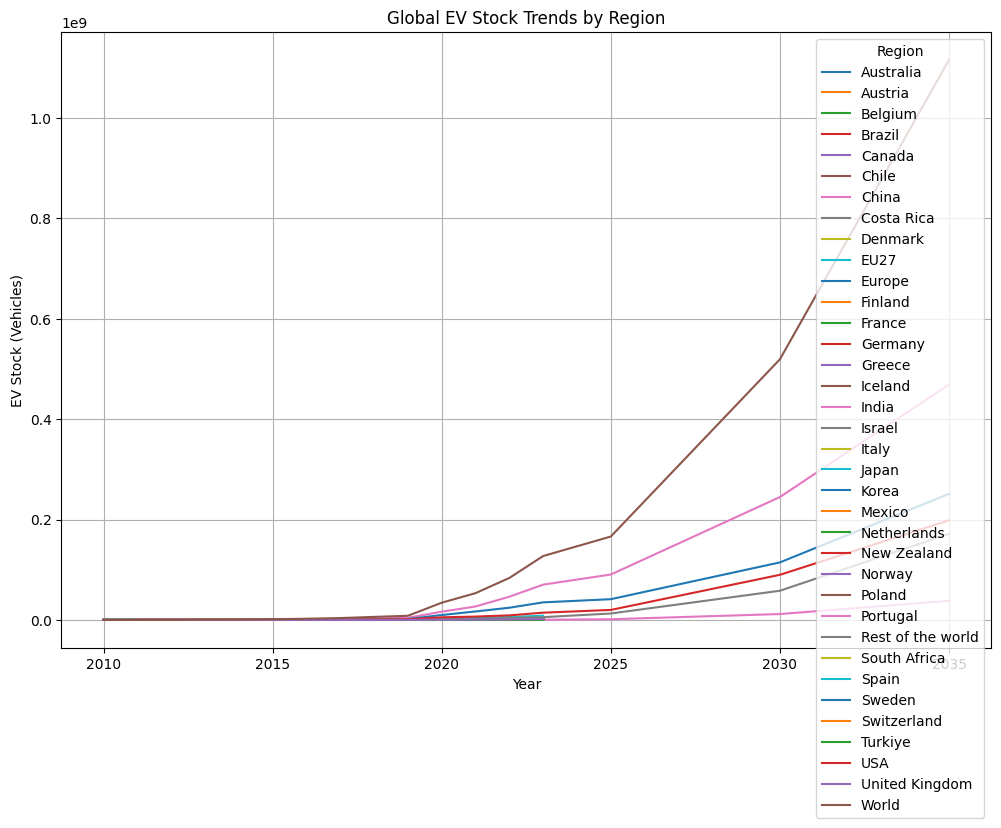

In [3]:

import matplotlib.pyplot as plt

# Filter for EV stock data
ev_stock = data[data['parameter'] == 'EV stock']

# Group by year and region
ev_stock_trends = ev_stock.groupby(['year', 'region'])['value'].sum().unstack()

# Plot global EV stock trends
ev_stock_trends.plot(kind='line', figsize=(12, 8), title="Global EV Stock Trends by Region")
plt.xlabel("Year")
plt.ylabel("EV Stock (Vehicles)")
plt.legend(title="Region")
plt.grid()
plt.show()


<Figure size 1400x800 with 0 Axes>

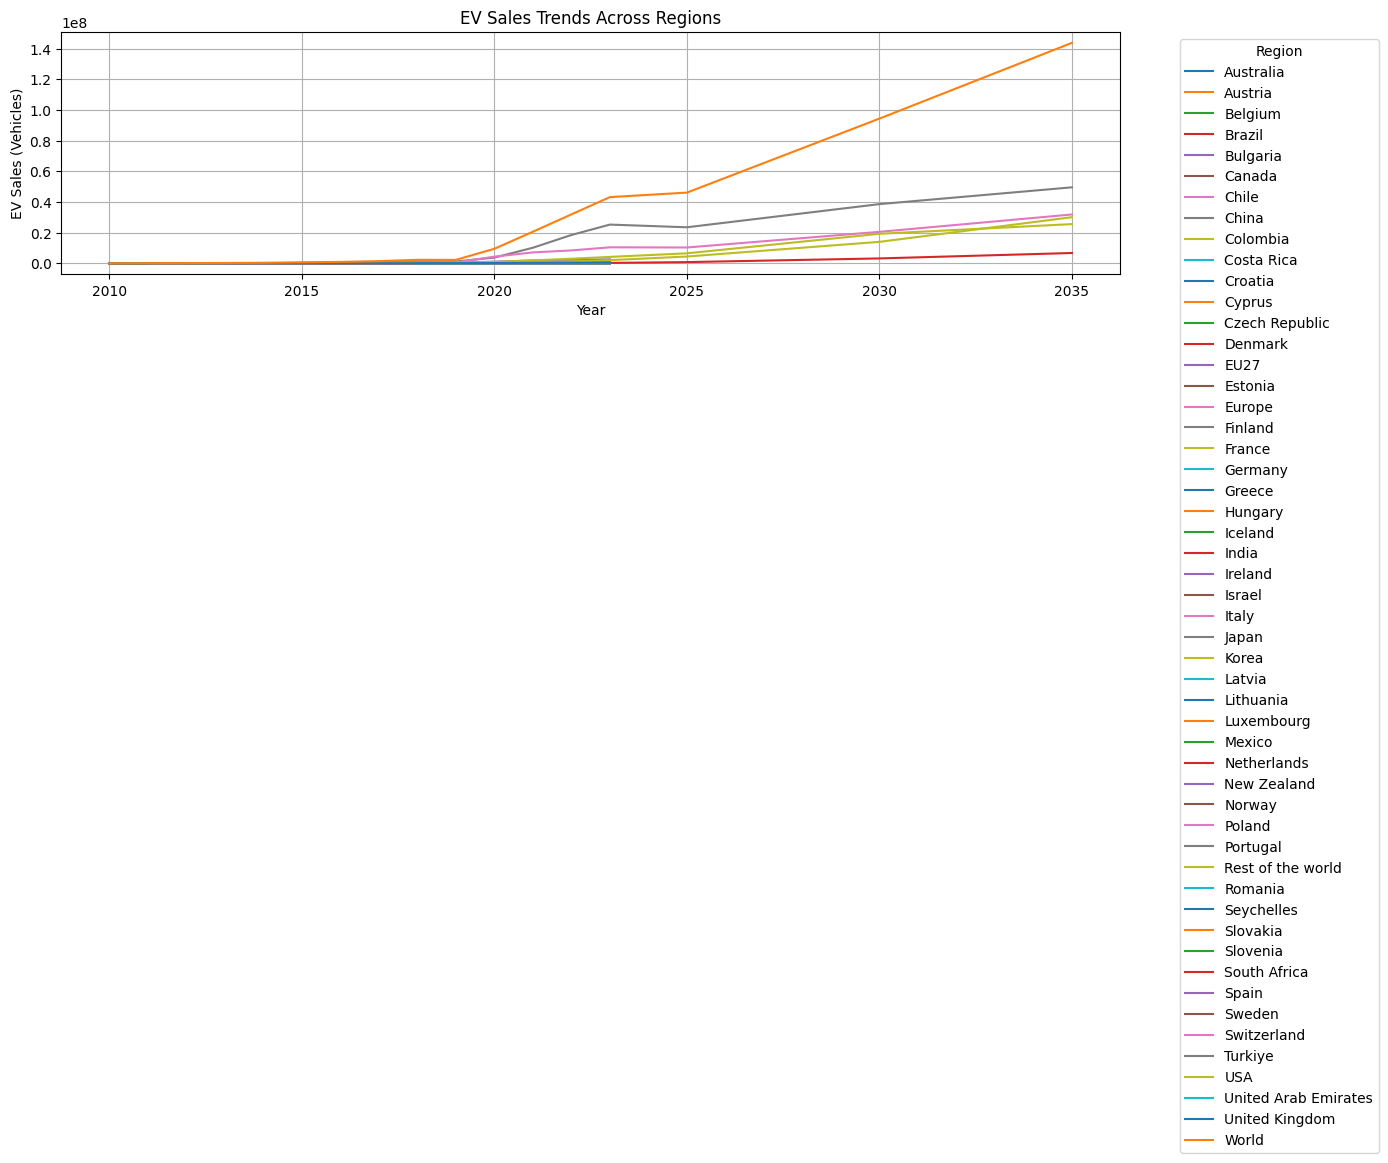

In [4]:
# Filter for EV sales data
ev_sales = data[(data['parameter'] == 'EV sales') & (data['unit'] == 'Vehicles')]

# Group by year and region to analyze EV sales trends
ev_sales_trends = ev_sales.groupby(['year', 'region'])['value'].sum().unstack()

# Plot EV sales trends across regions
plt.figure(figsize=(14, 8))
ev_sales_trends.plot(kind='line', title="EV Sales Trends Across Regions", figsize=(14, 8))
plt.xlabel("Year")
plt.ylabel("EV Sales (Vehicles)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()



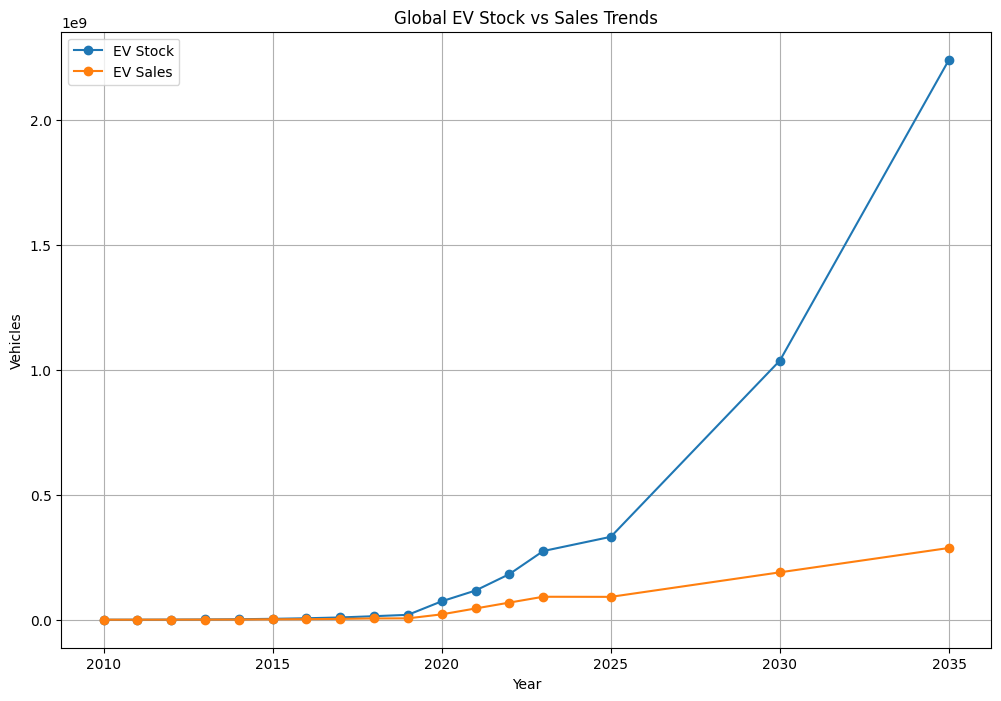

In [5]:

# Filter for EV stock and EV sales data
ev_stock = data[(data['parameter'] == 'EV stock') & (data['unit'] == 'Vehicles')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['unit'] == 'Vehicles')]

# Group by year
ev_stock_trends = ev_stock.groupby('year')['value'].sum()
ev_sales_trends = ev_sales.groupby('year')['value'].sum()

# Plot EV stock versus EV sales trends
plt.figure(figsize=(12, 8))
plt.plot(ev_stock_trends.index, ev_stock_trends.values, label="EV Stock", marker='o')
plt.plot(ev_sales_trends.index, ev_sales_trends.values, label="EV Sales", marker='o')
plt.title("Global EV Stock vs Sales Trends")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.legend()
plt.grid()
plt.show()



<Figure size 1200x800 with 0 Axes>

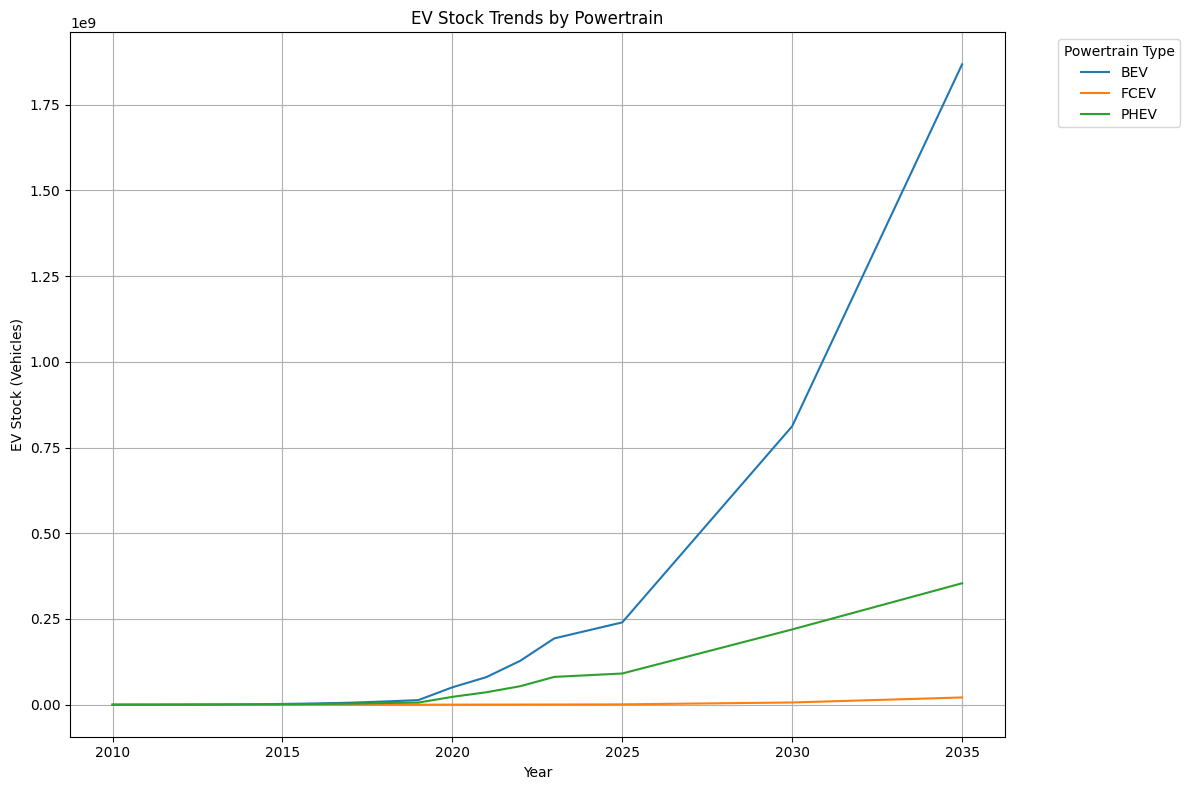

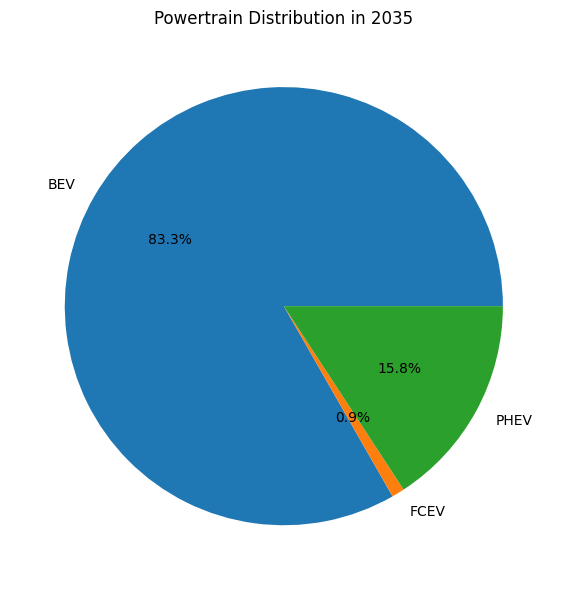

In [6]:
# EV adoption by powertrain type

# Filter by powertrain
ev_powertrain_stock = data[(data['parameter'] == 'EV stock') & (data['unit'] == 'Vehicles')]

# Group by powertrain and year
powertrain_trends = ev_powertrain_stock.groupby(['year', 'powertrain'])['value'].sum().unstack()

# Plot by powertrain
plt.figure(figsize=(12, 8))
powertrain_trends.plot(kind='line', title="EV Stock Trends by Powertrain", figsize=(12, 8))
plt.xlabel("Year")
plt.ylabel("EV Stock (Vehicles)")
plt.legend(title="Powertrain Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Distribution of powertrain types in the most recent year
latest_year = ev_powertrain_stock['year'].max()
powertrain_distribution = ev_powertrain_stock[ev_powertrain_stock['year'] == latest_year].groupby('powertrain')['value'].sum()

# Plot distribution of powertrain types
plt.figure(figsize=(10, 6))
powertrain_distribution.plot(kind='pie', autopct='%1.1f%%', title=f"Powertrain Distribution in {latest_year}")
plt.ylabel("")
plt.tight_layout()
plt.show()



<Figure size 1600x1000 with 0 Axes>

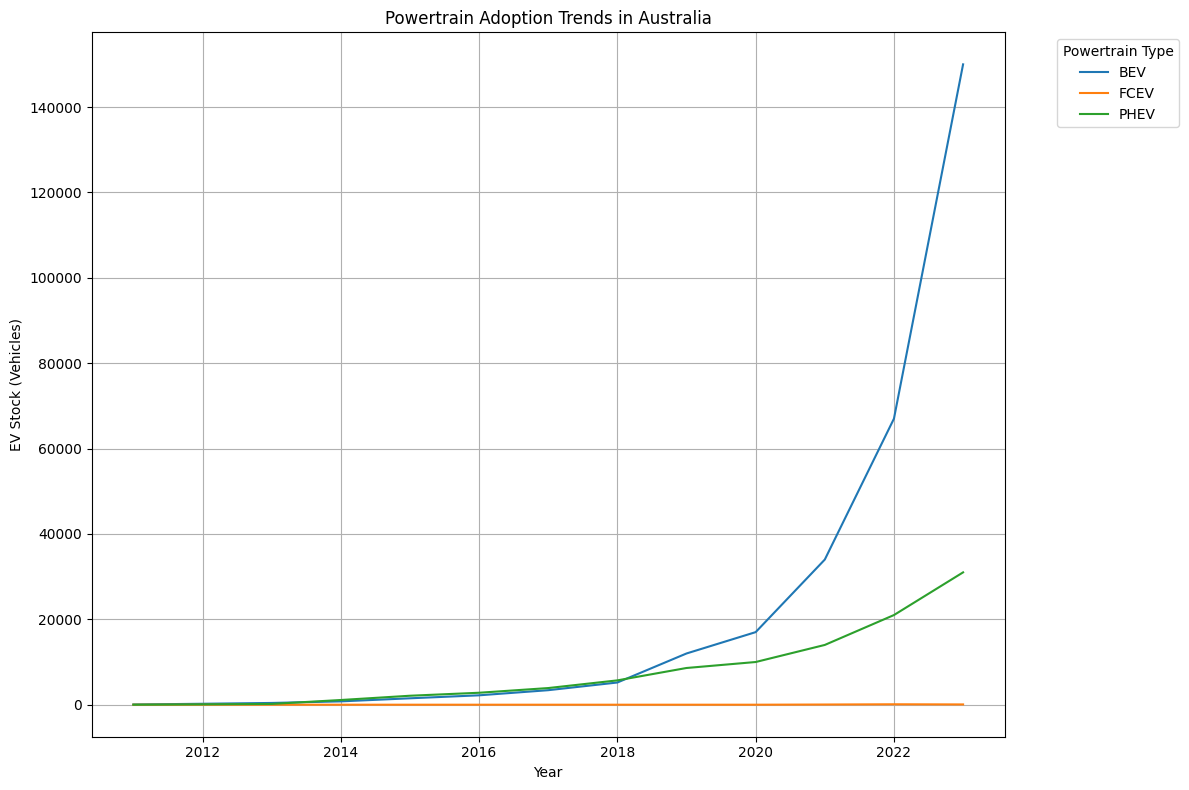

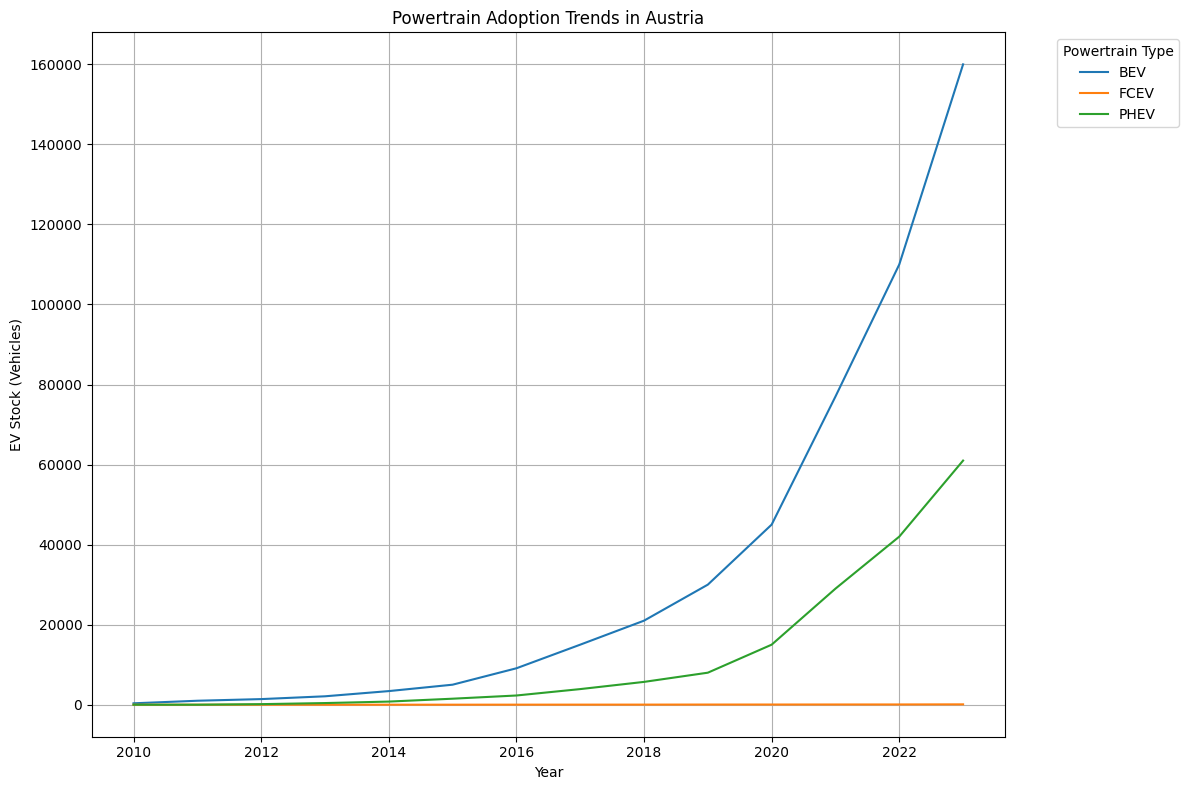

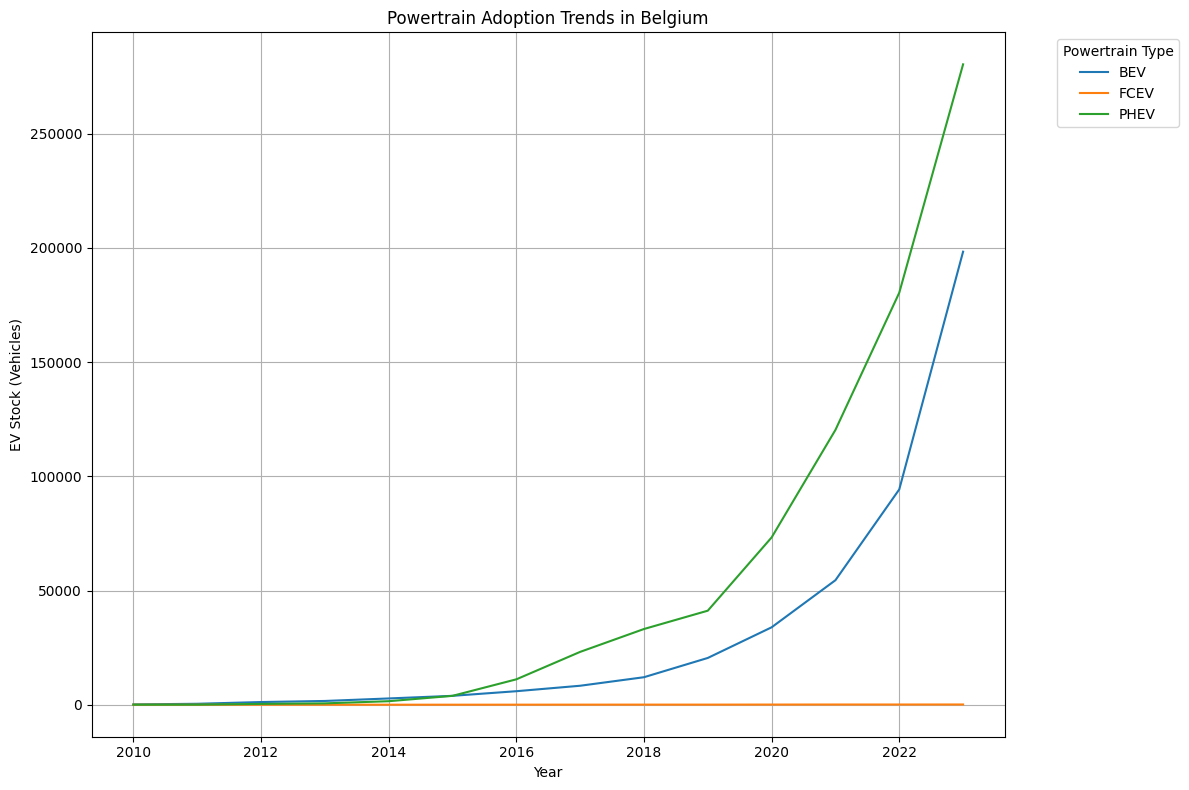

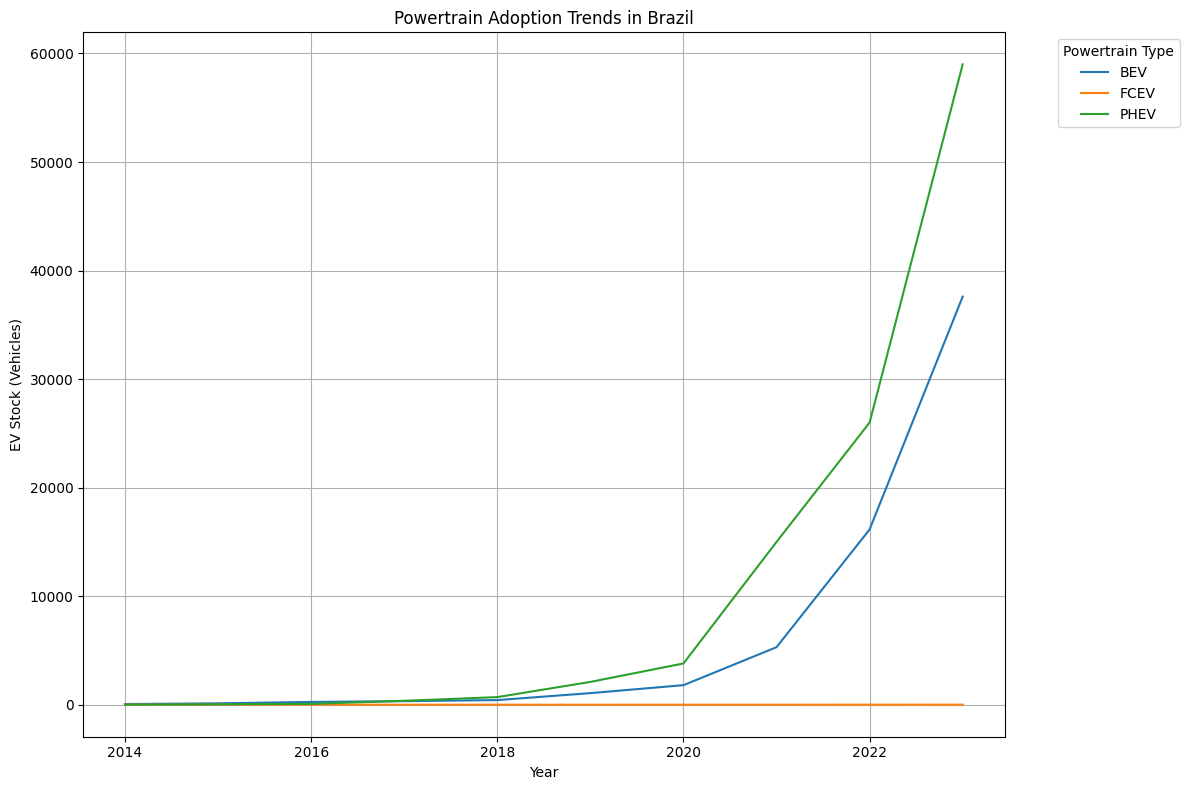

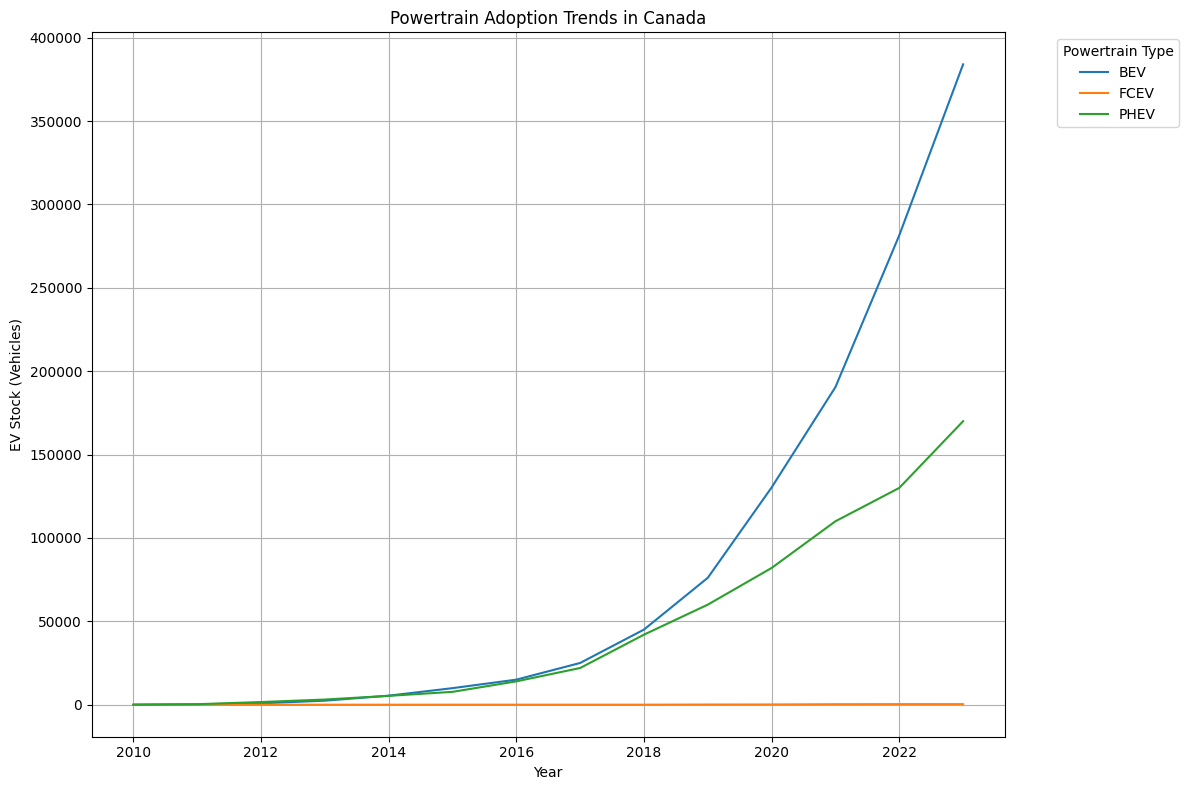

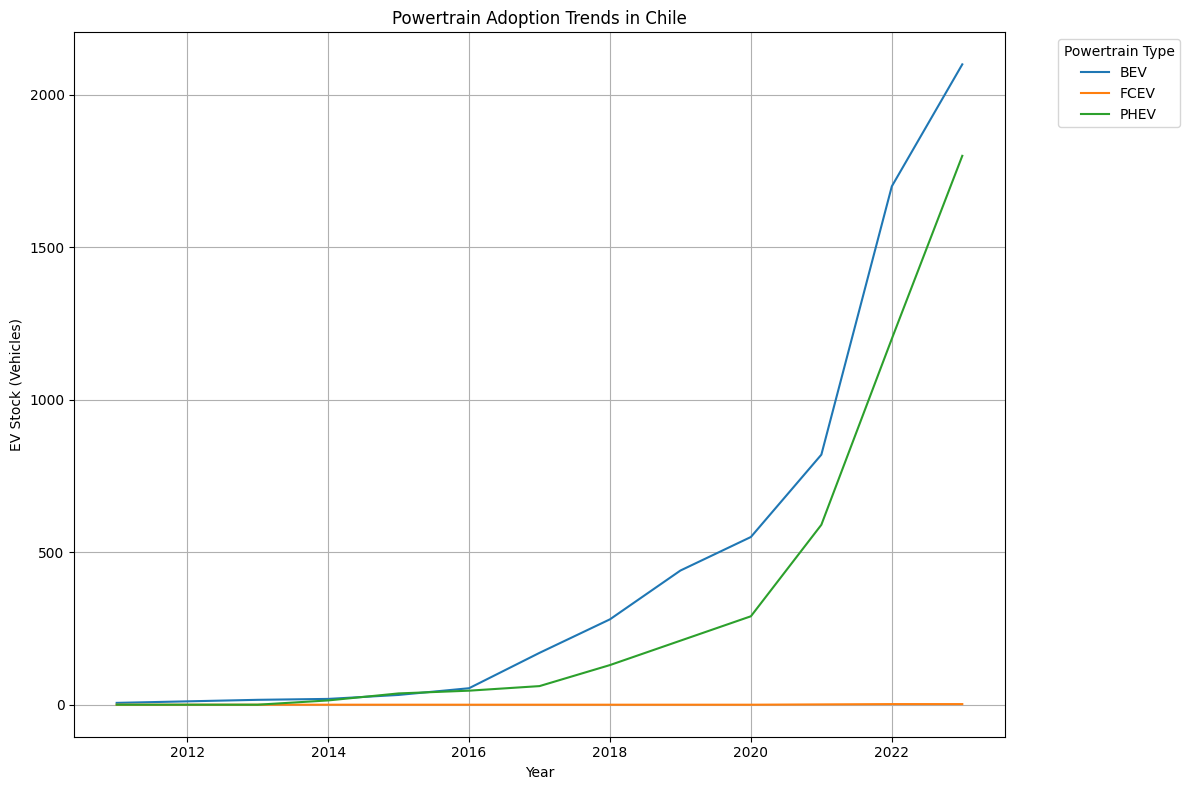

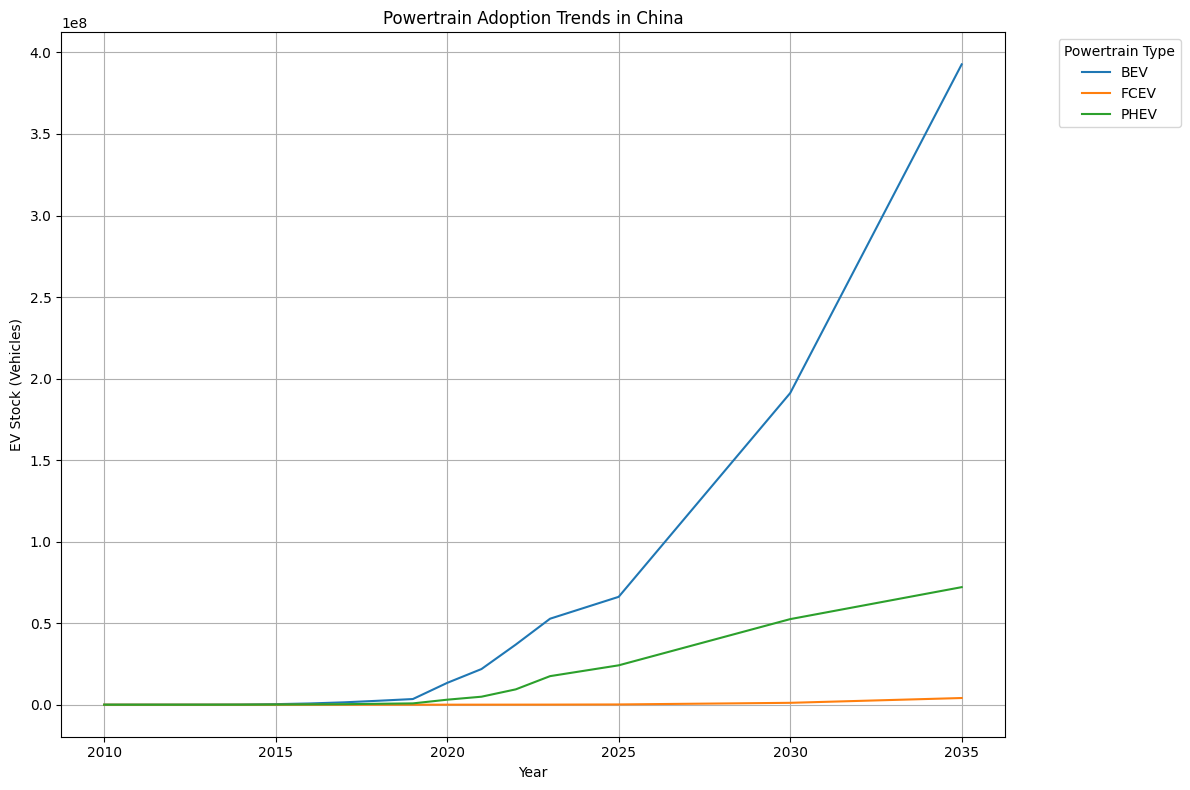

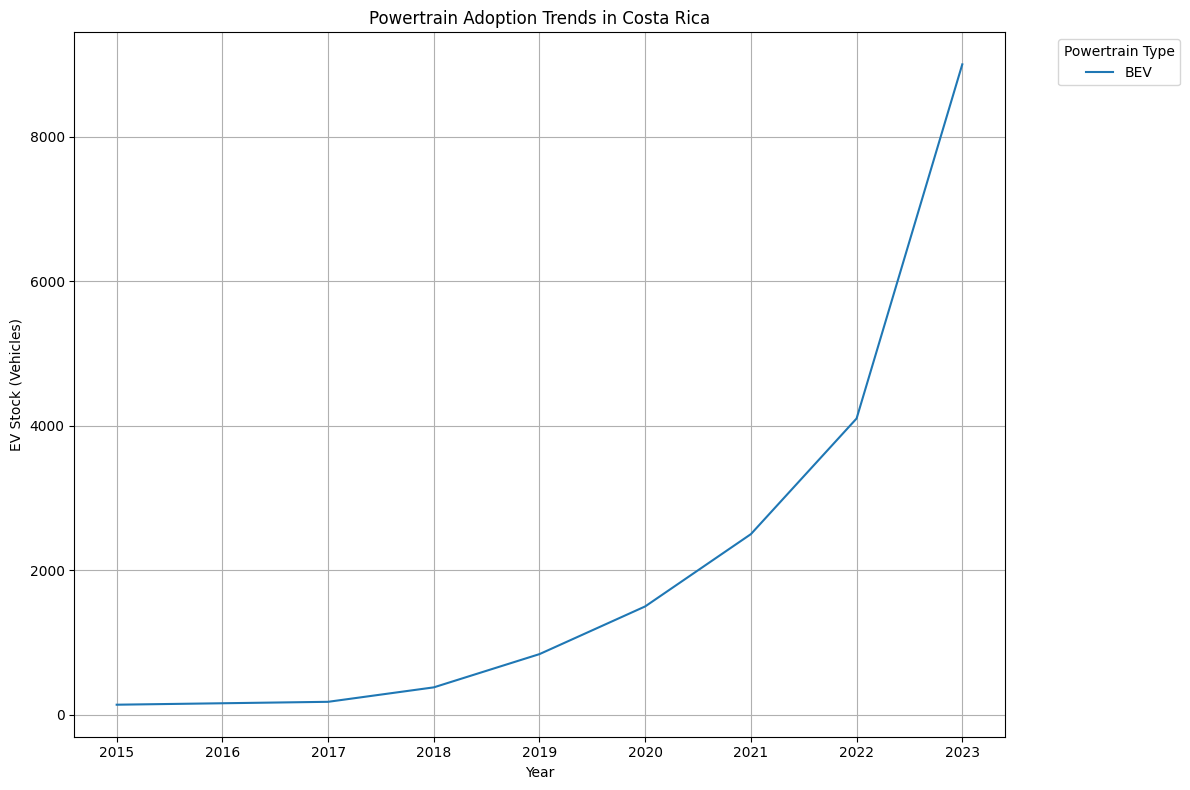

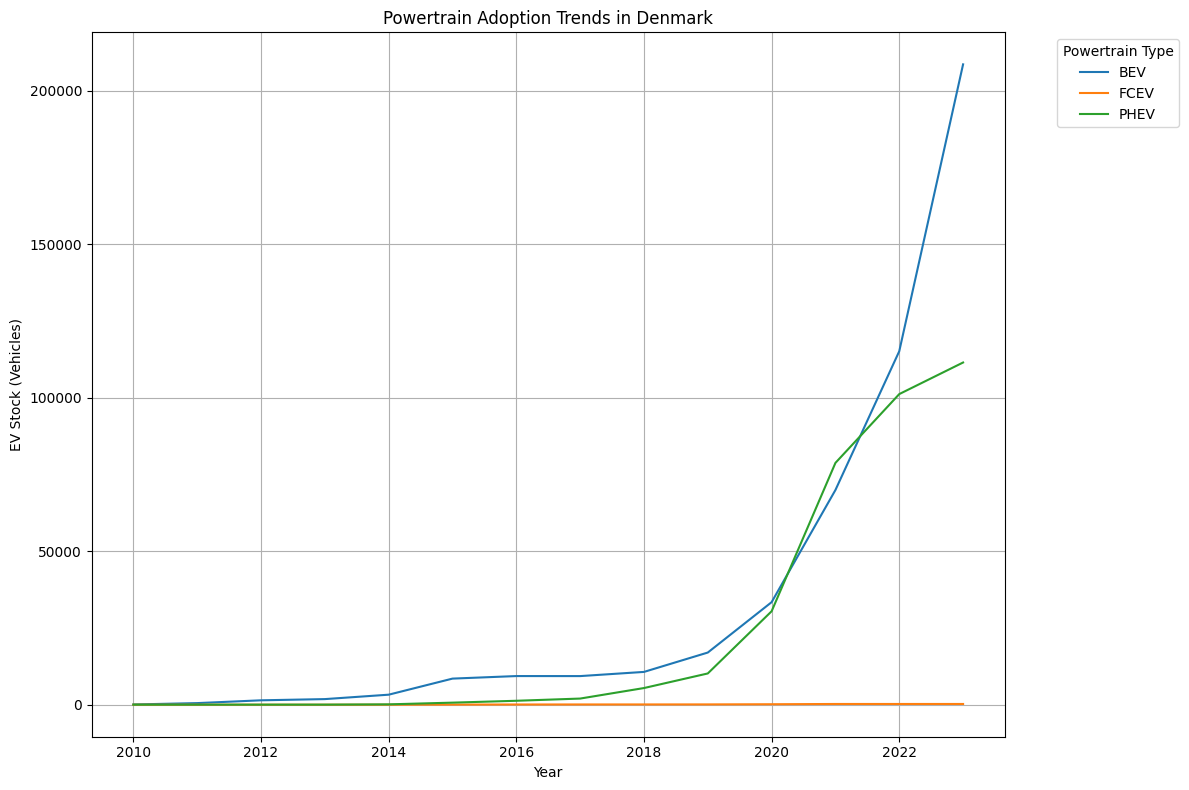

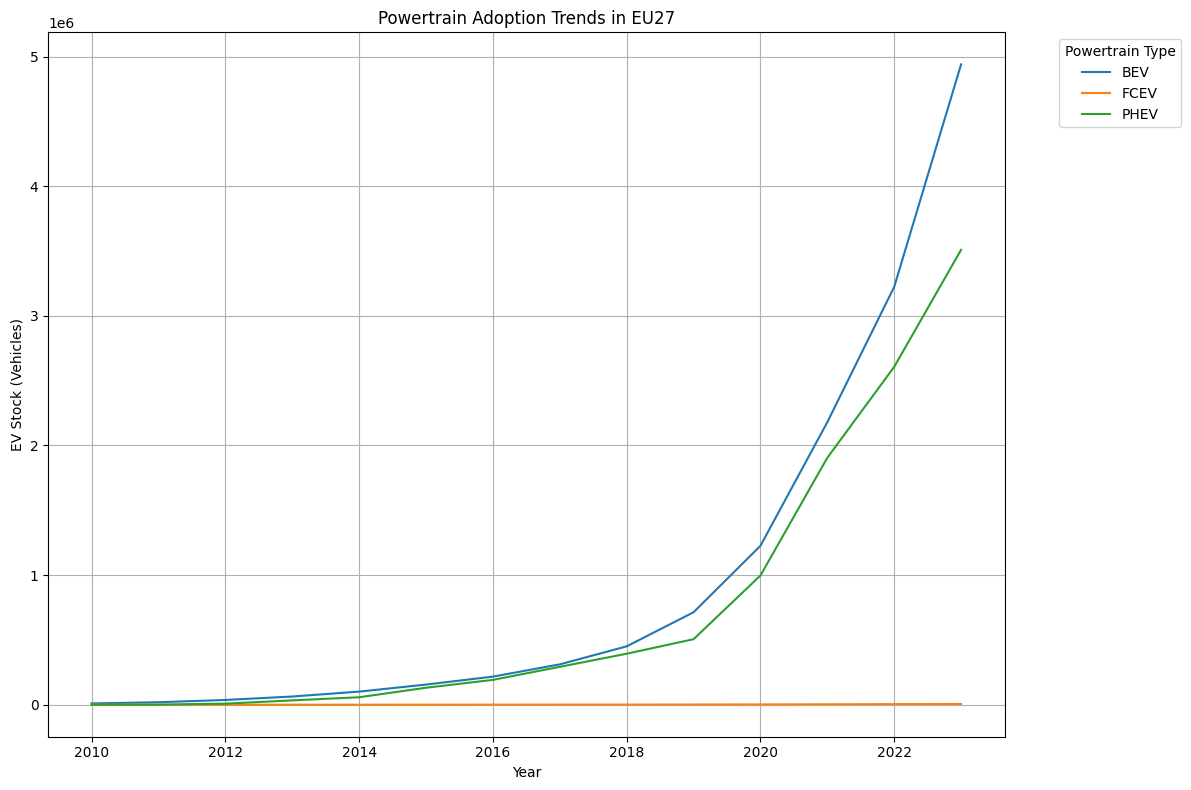

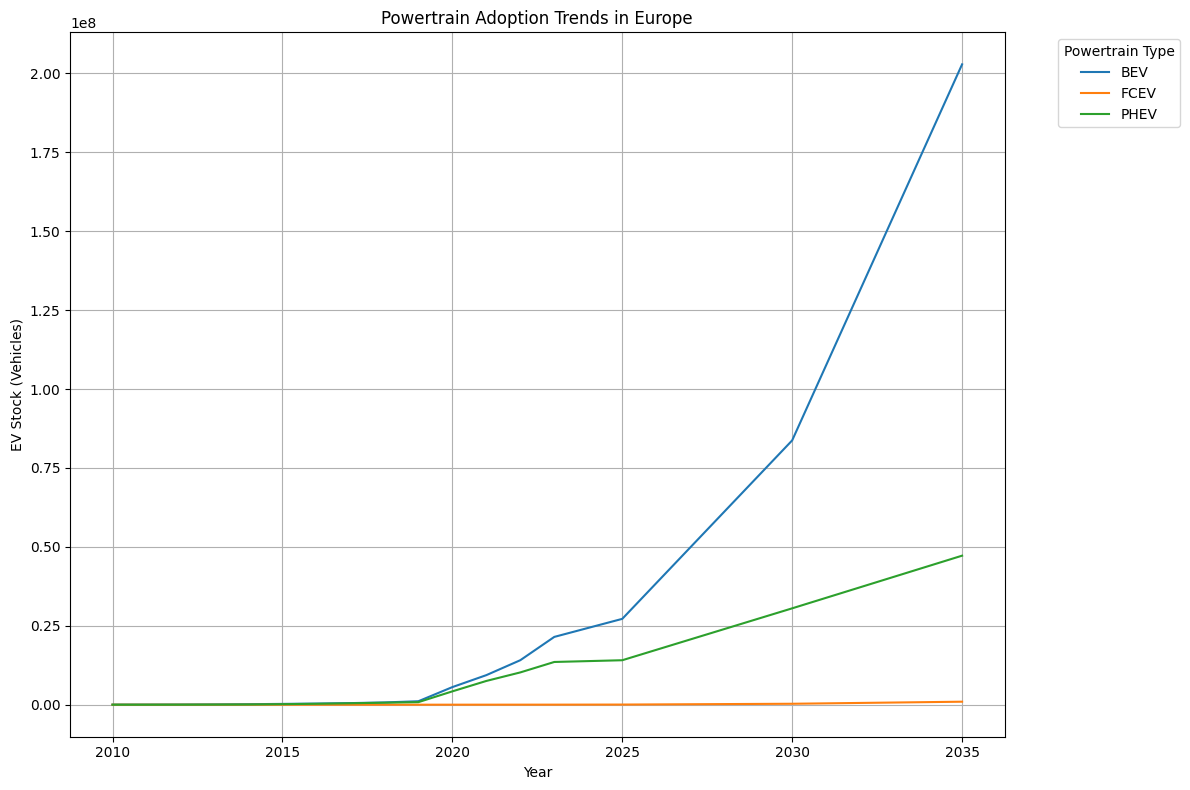

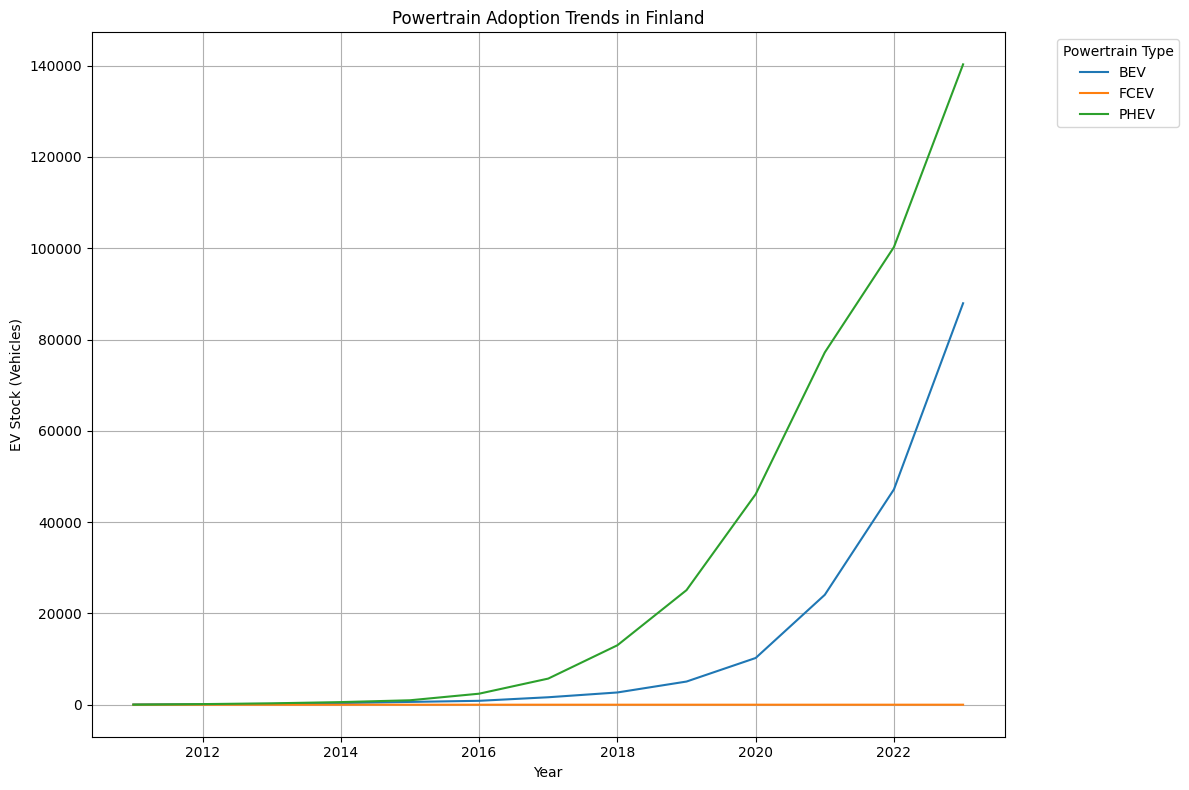

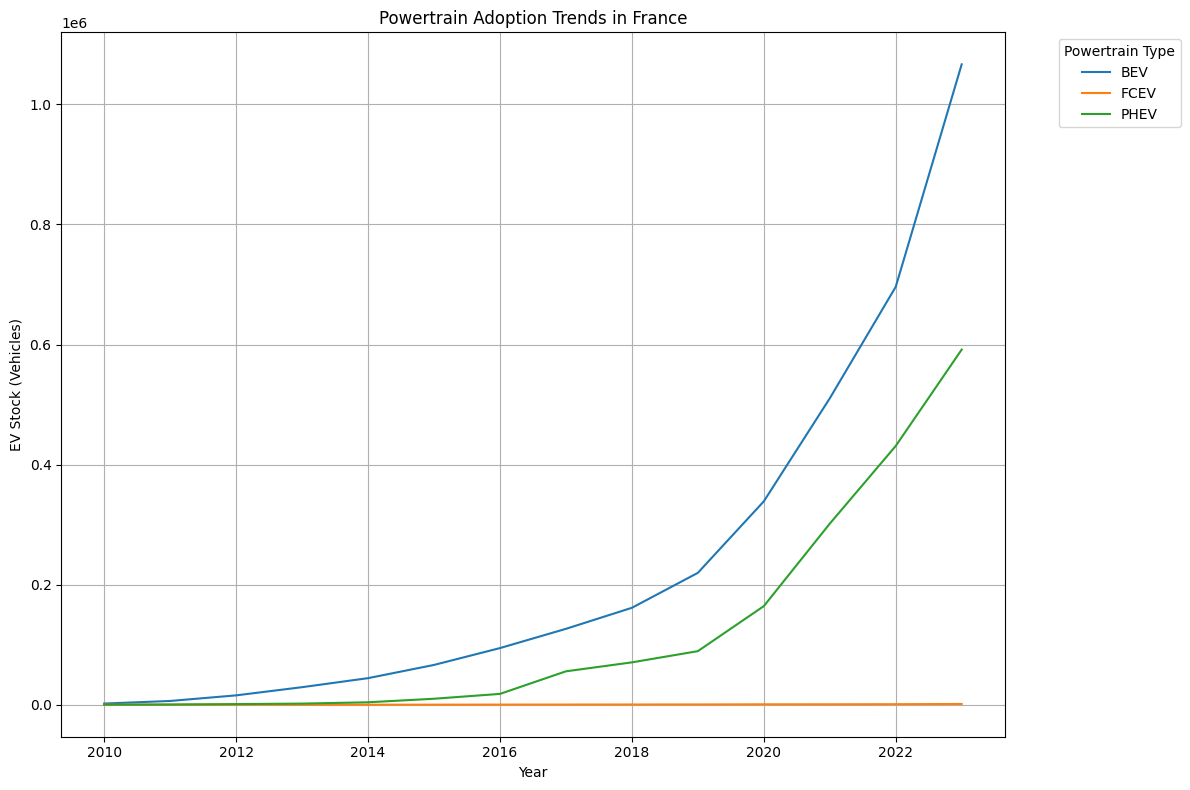

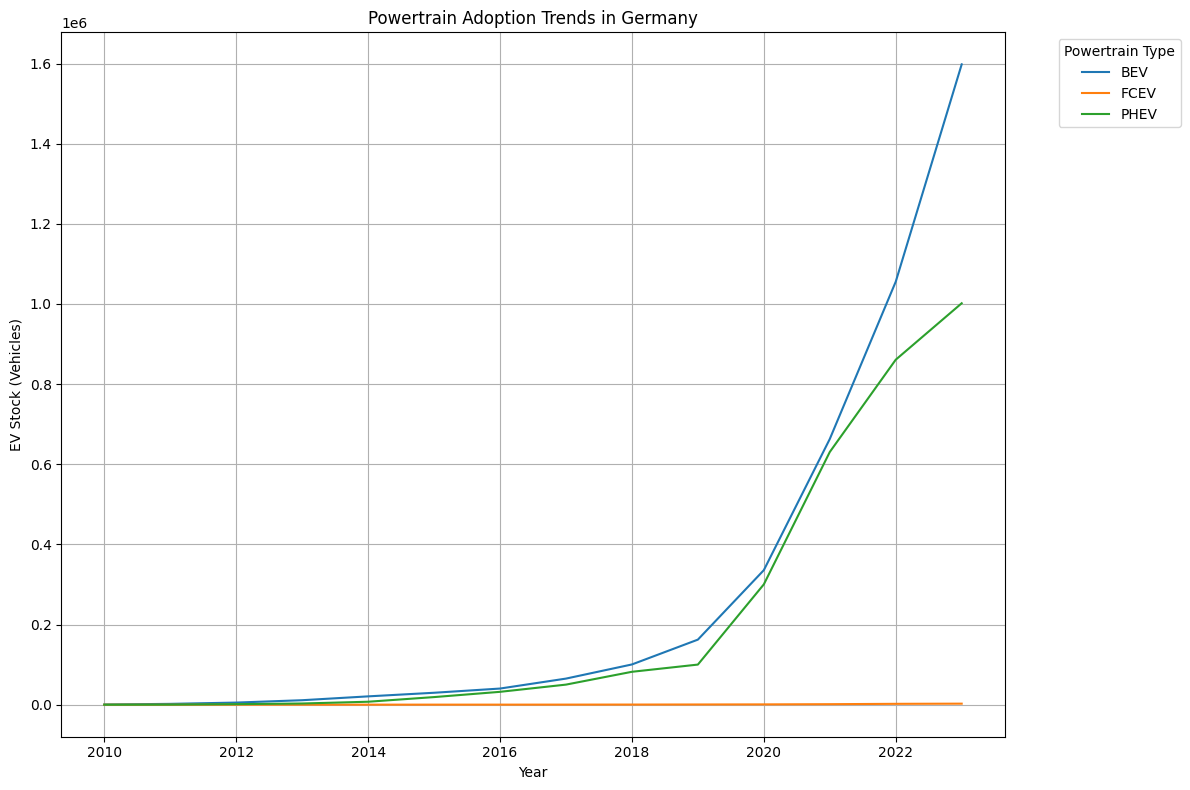

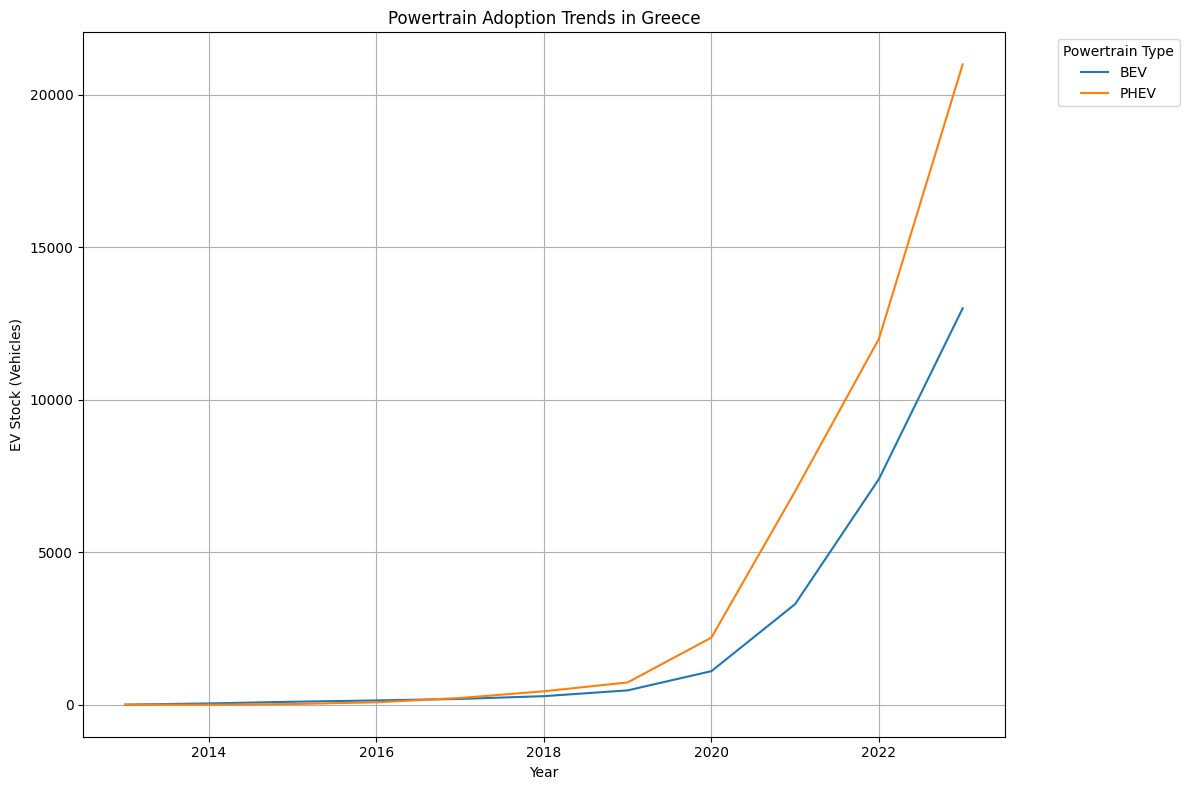

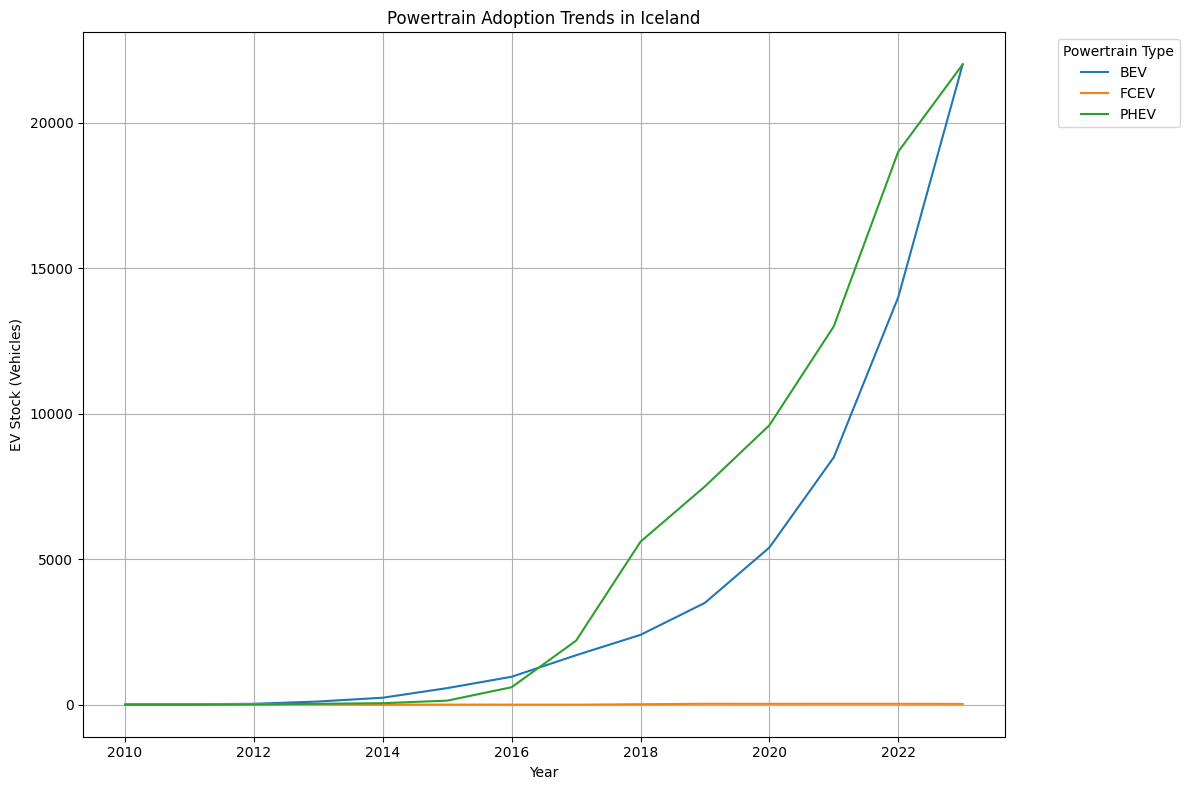

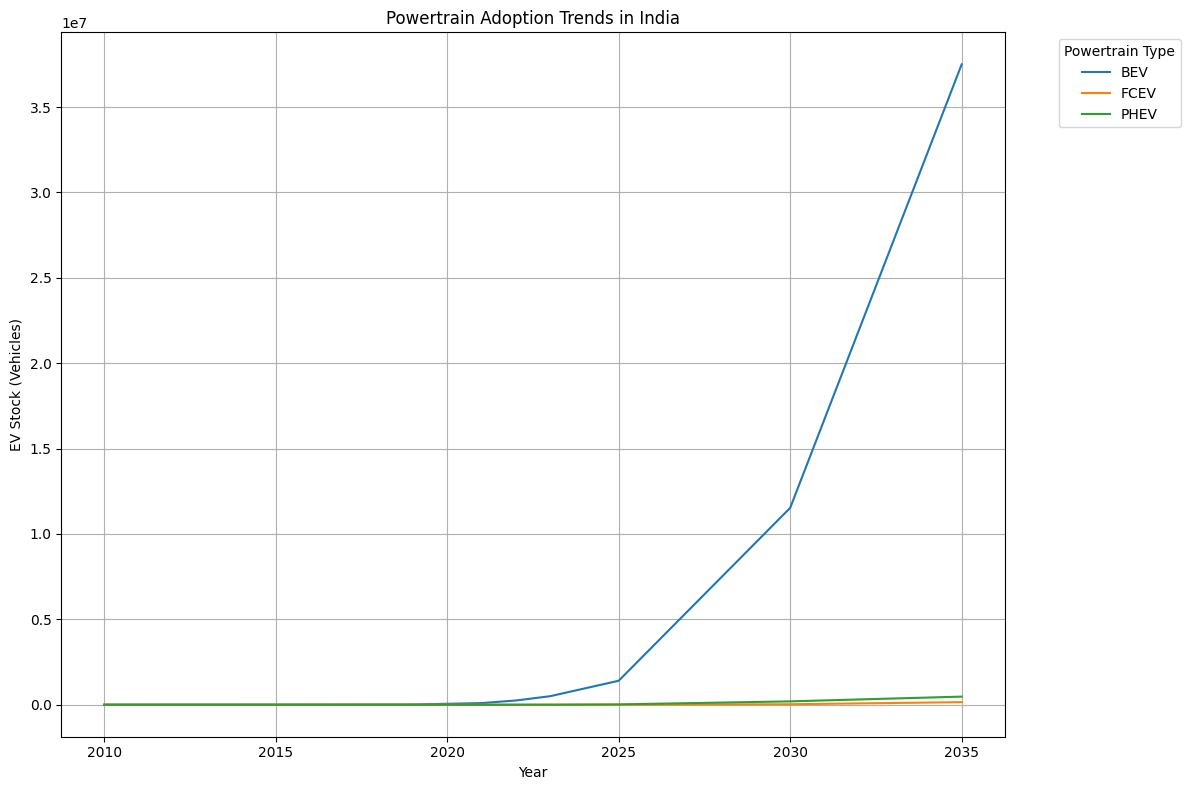

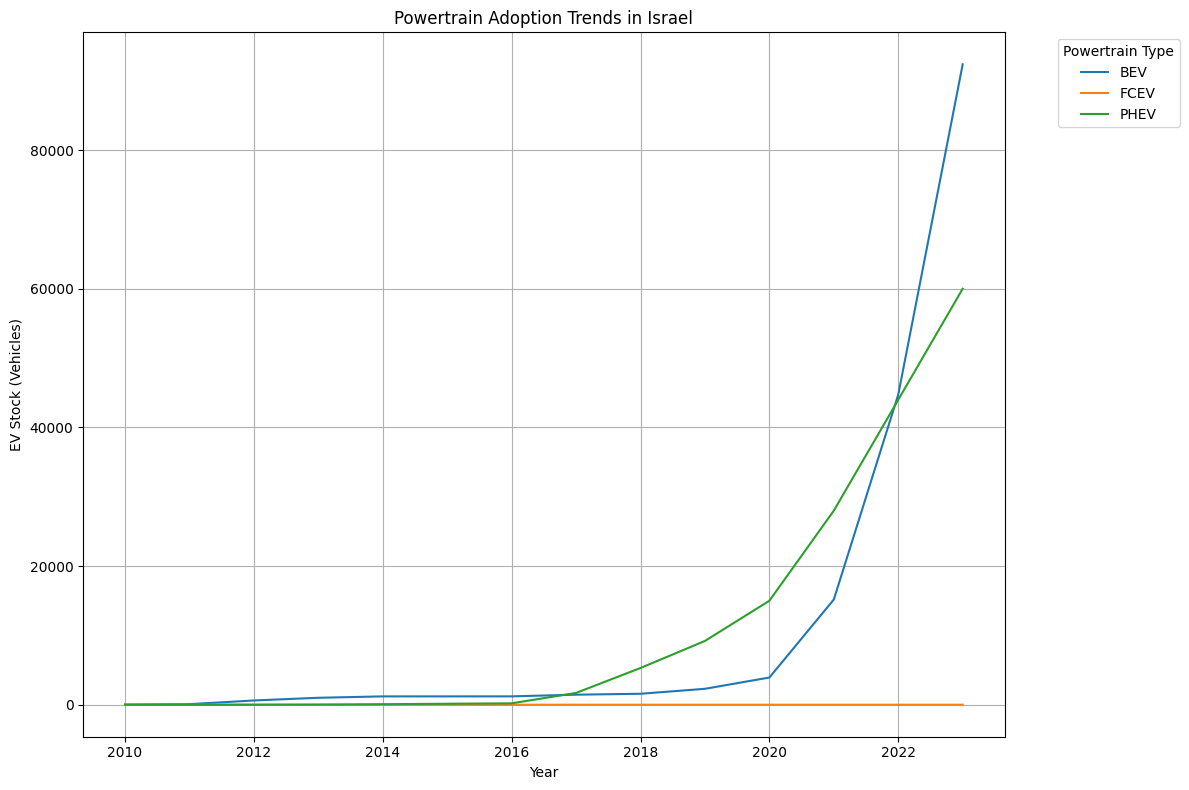

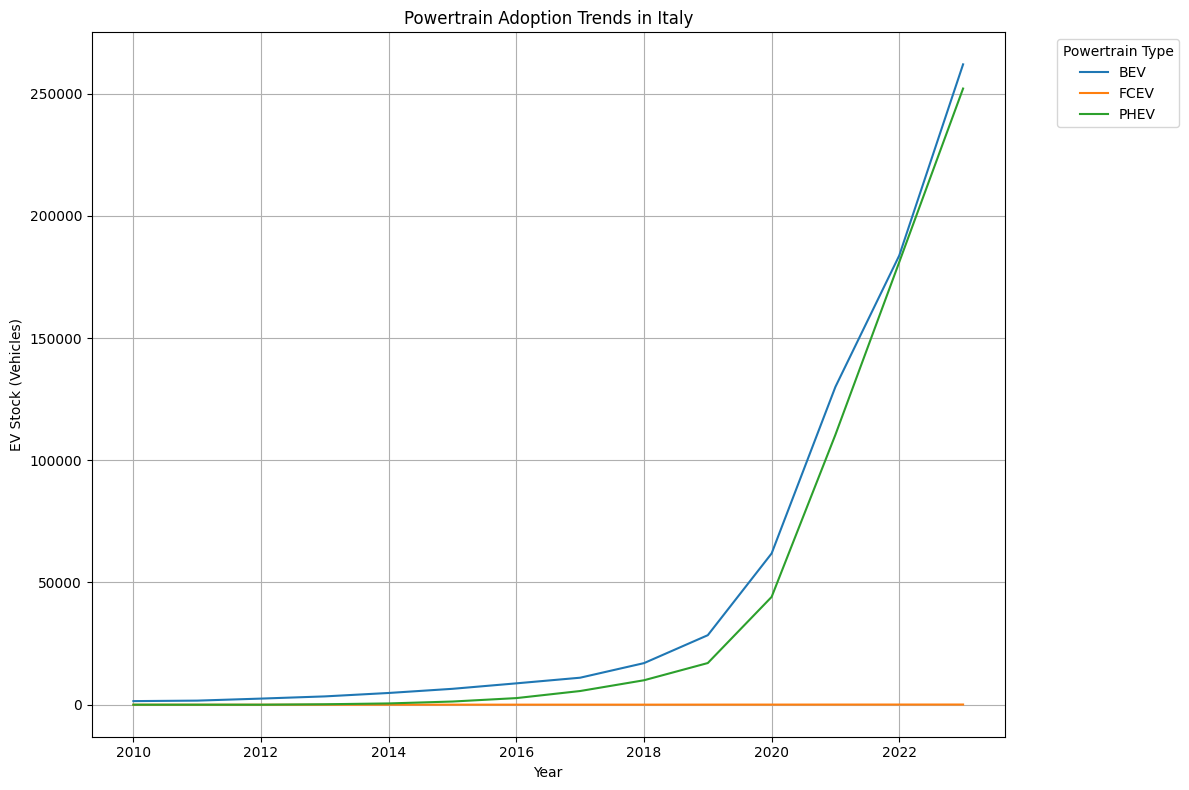

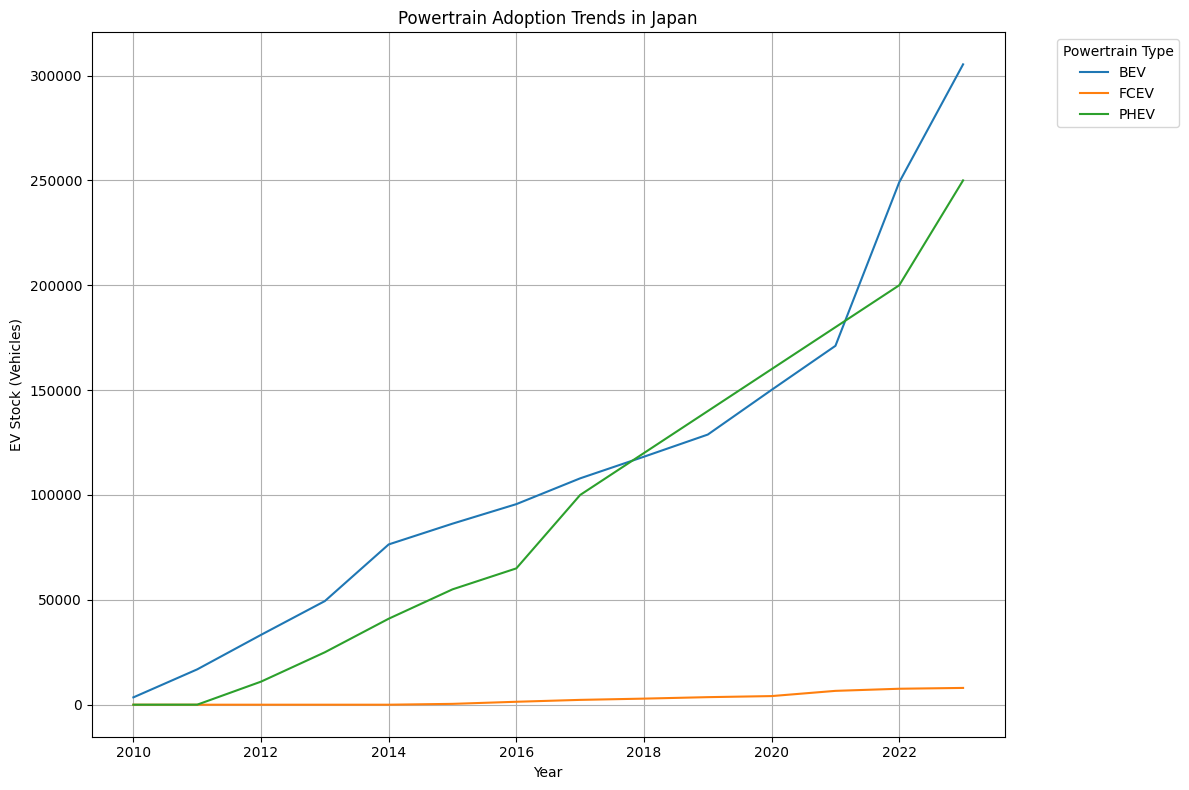

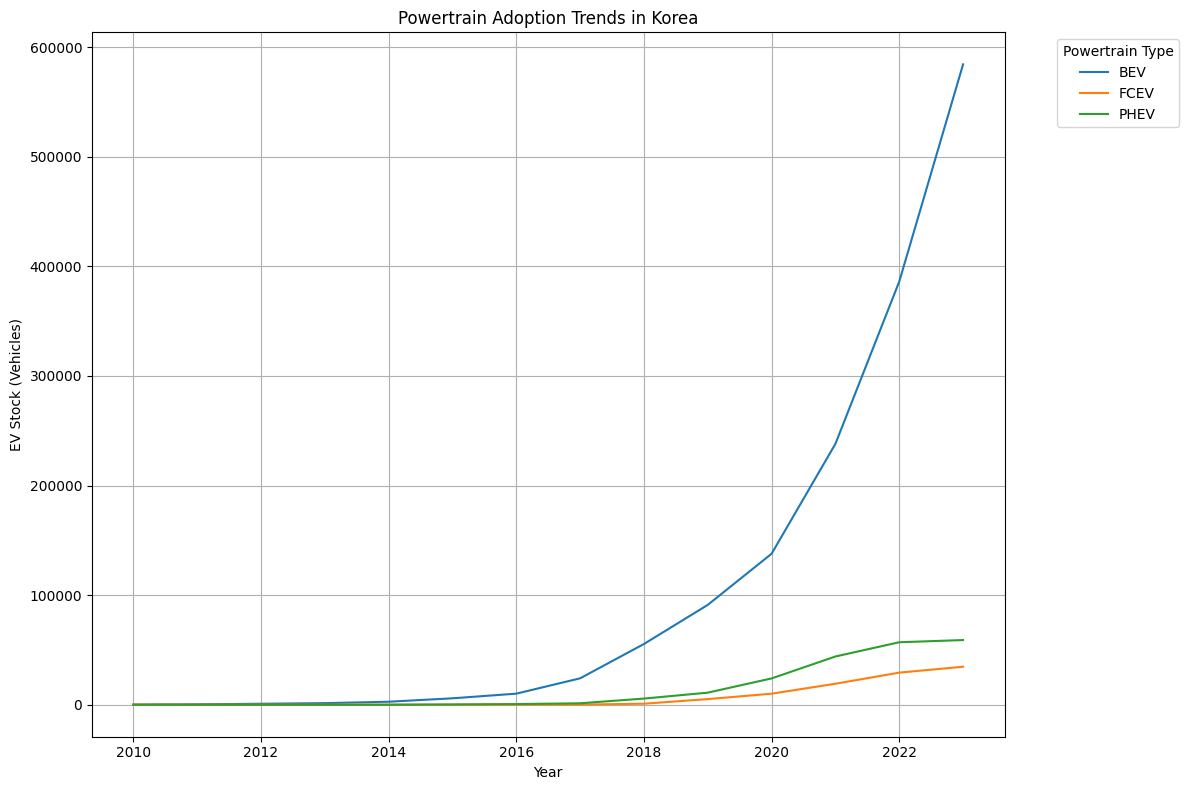

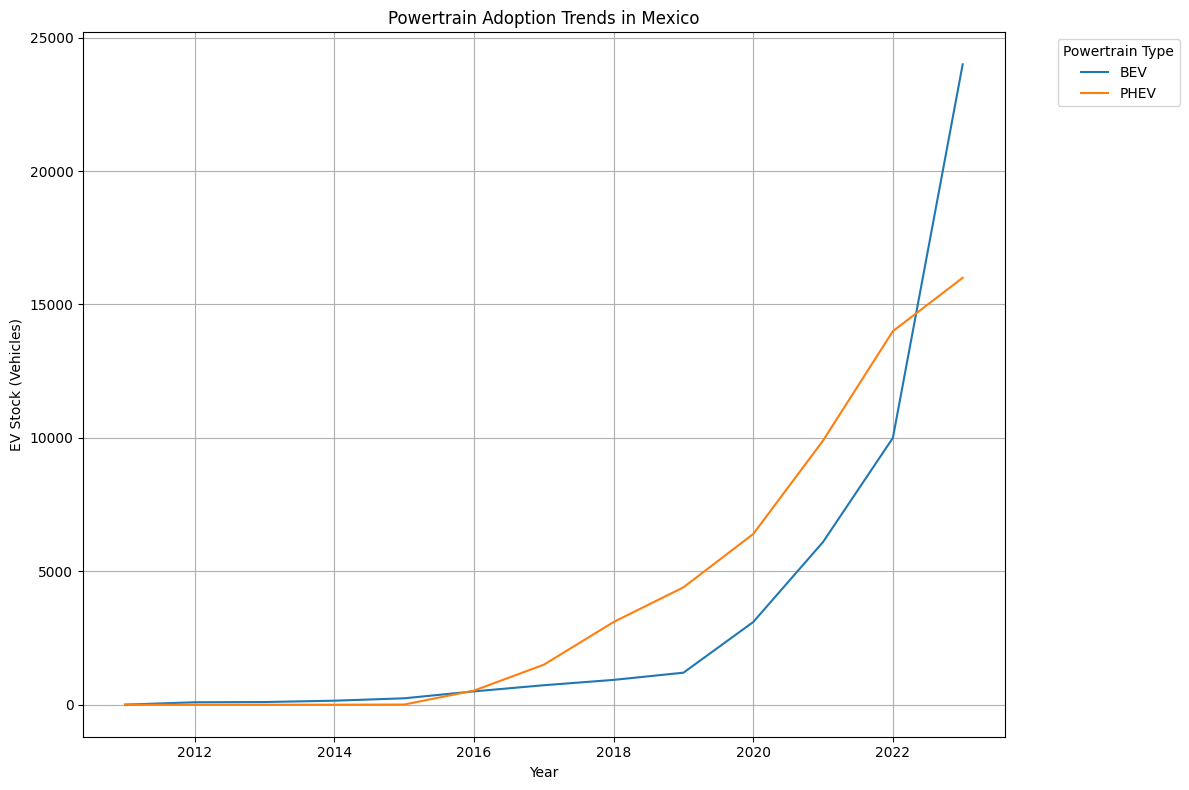

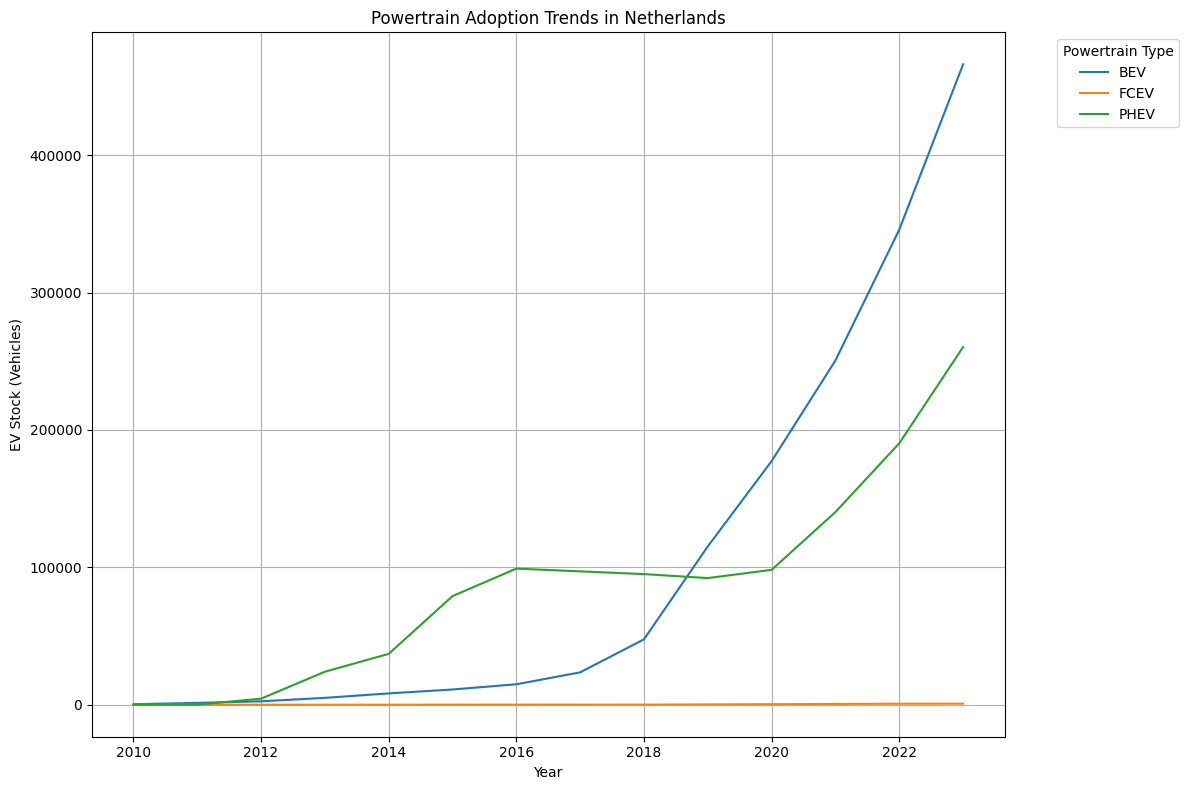

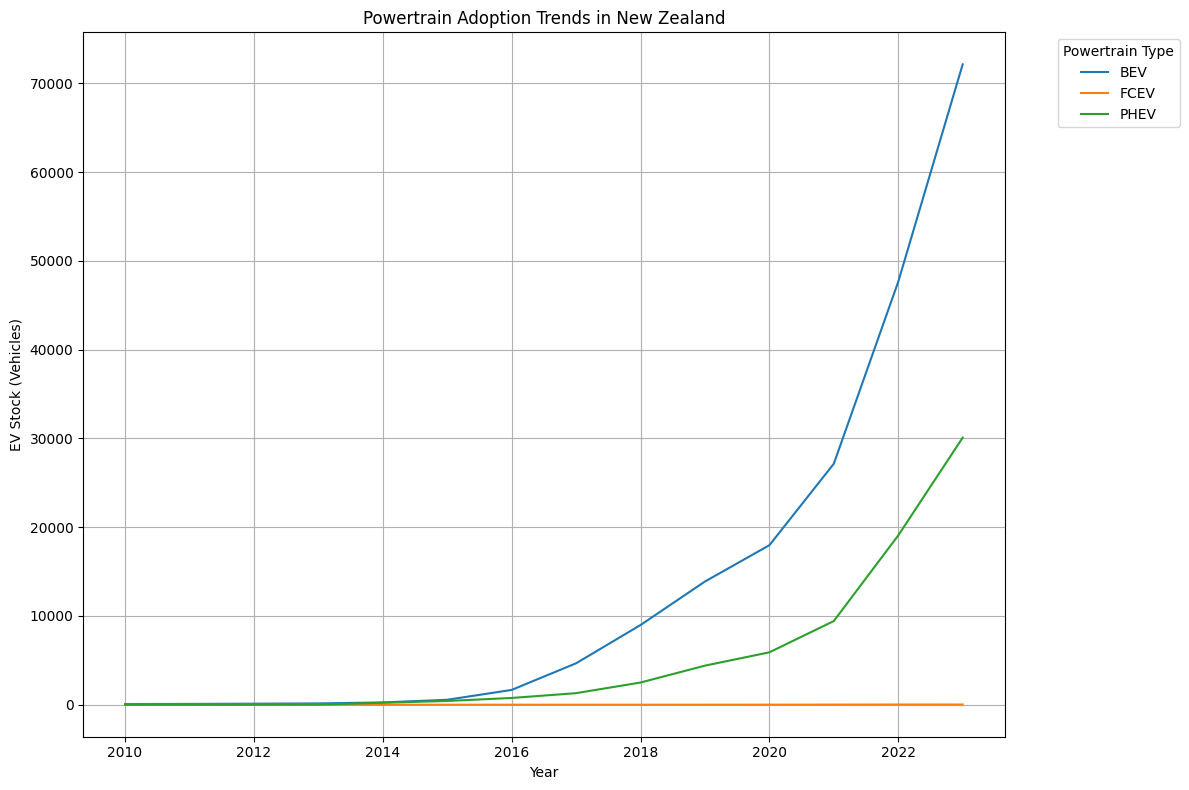

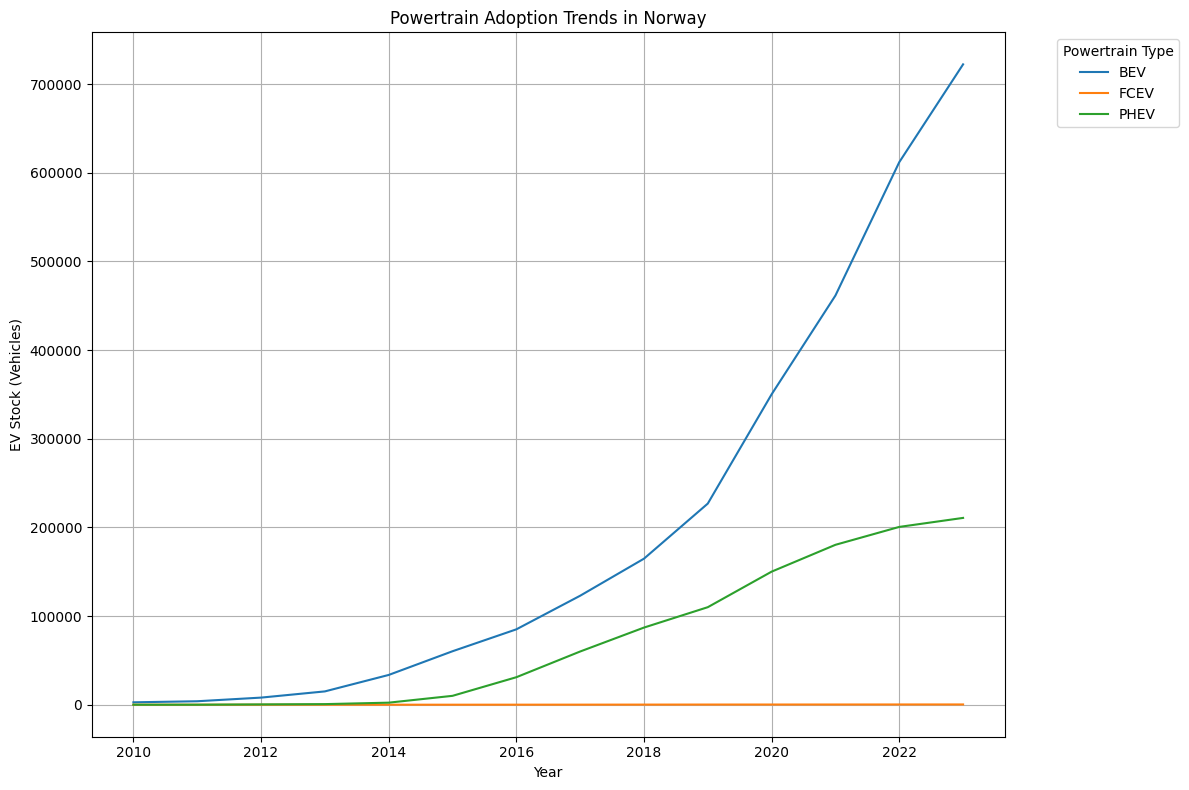

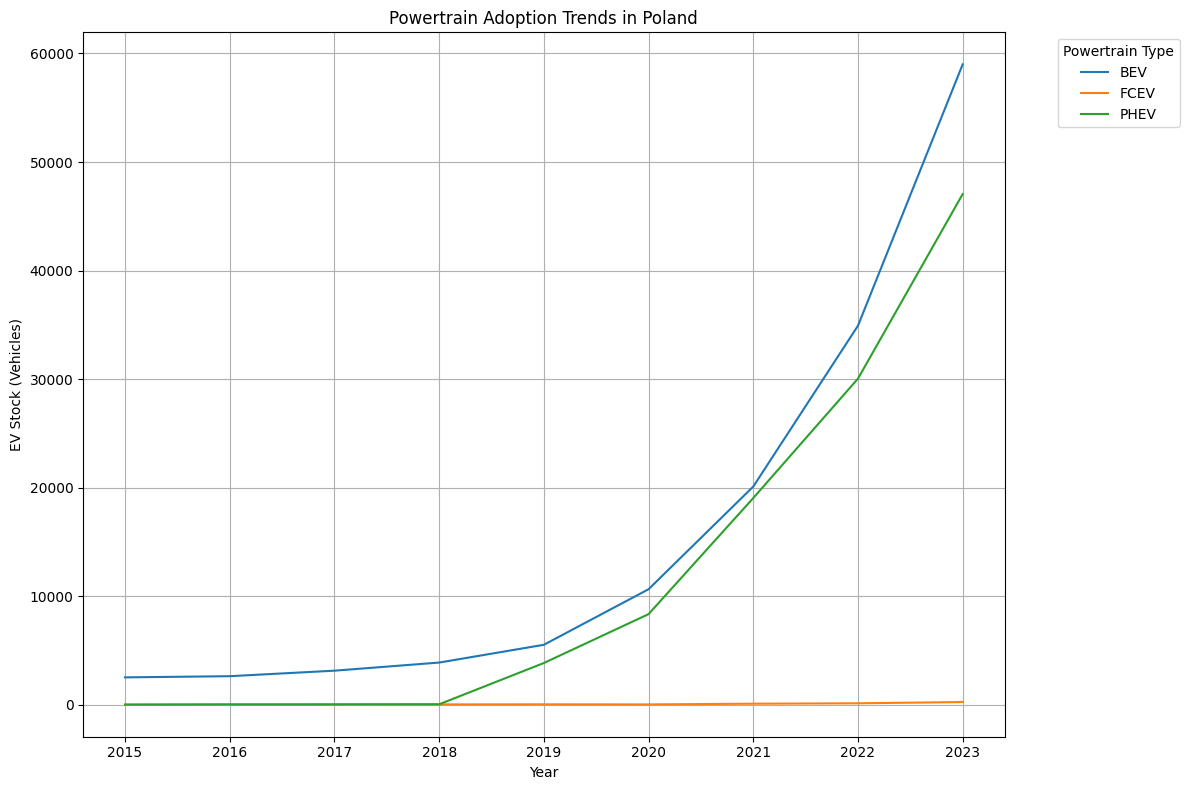

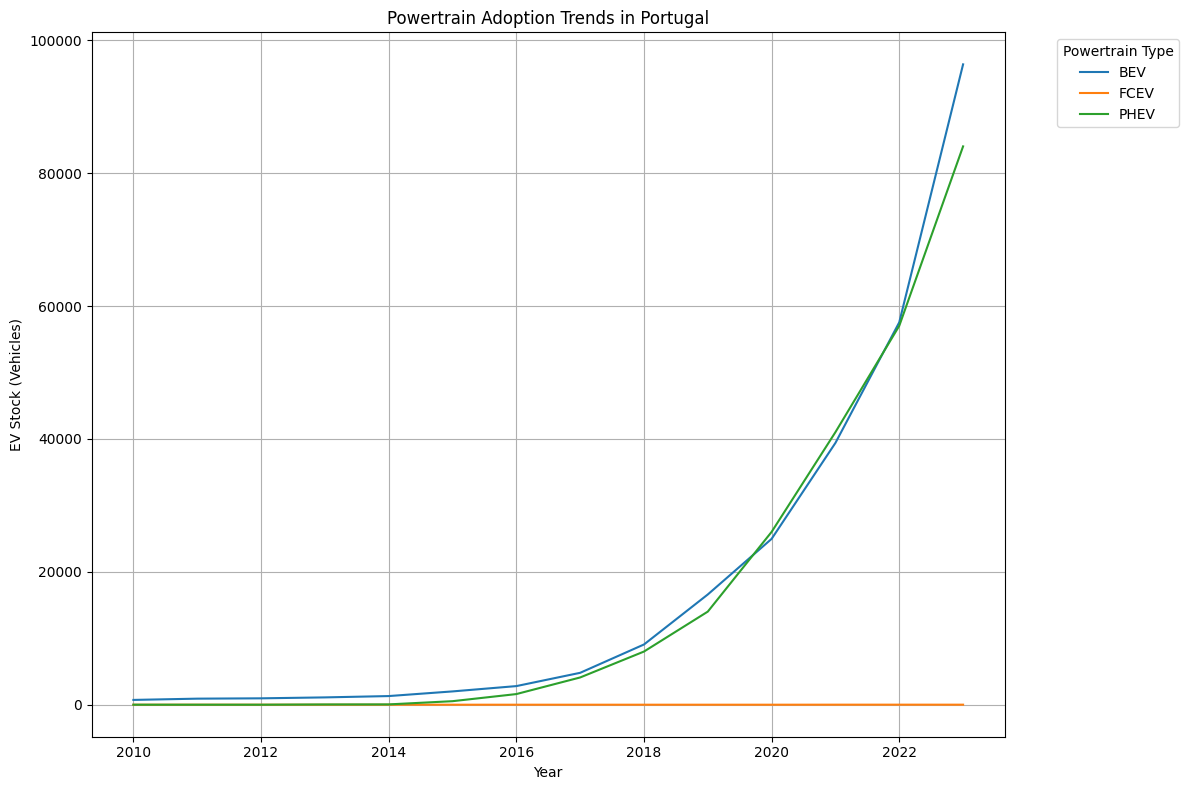

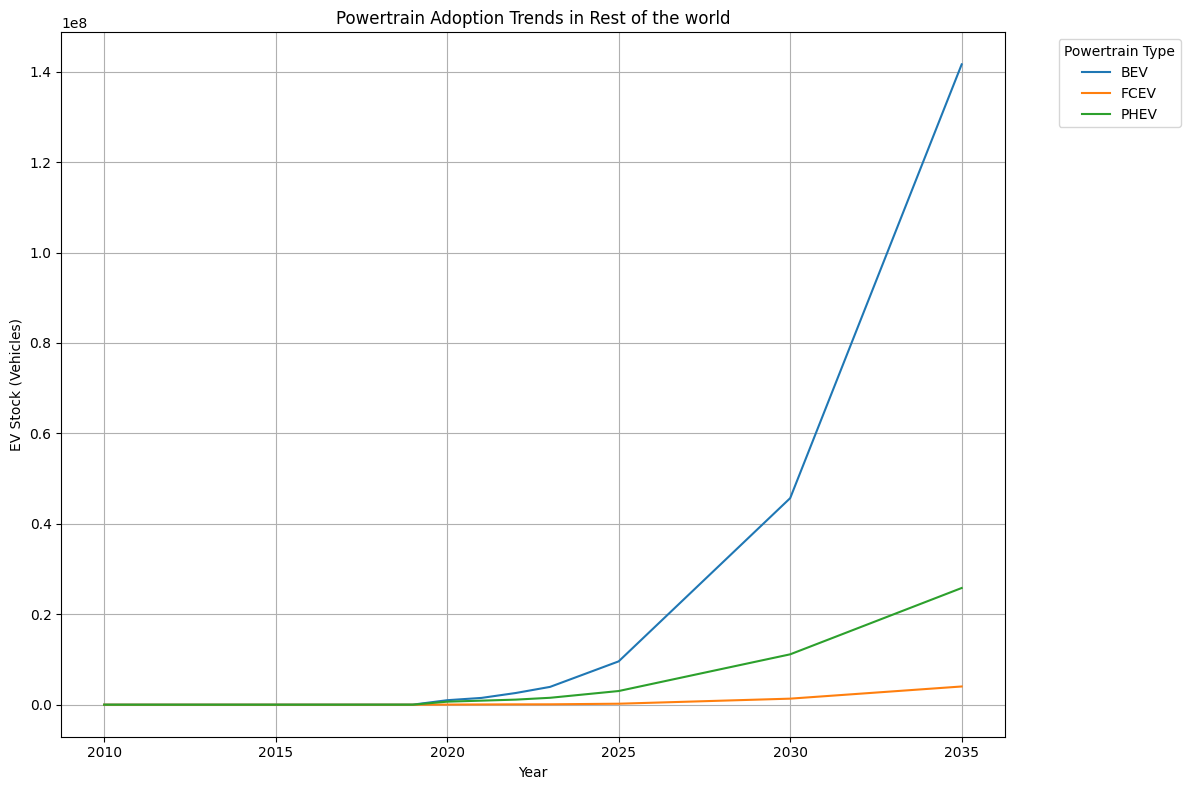

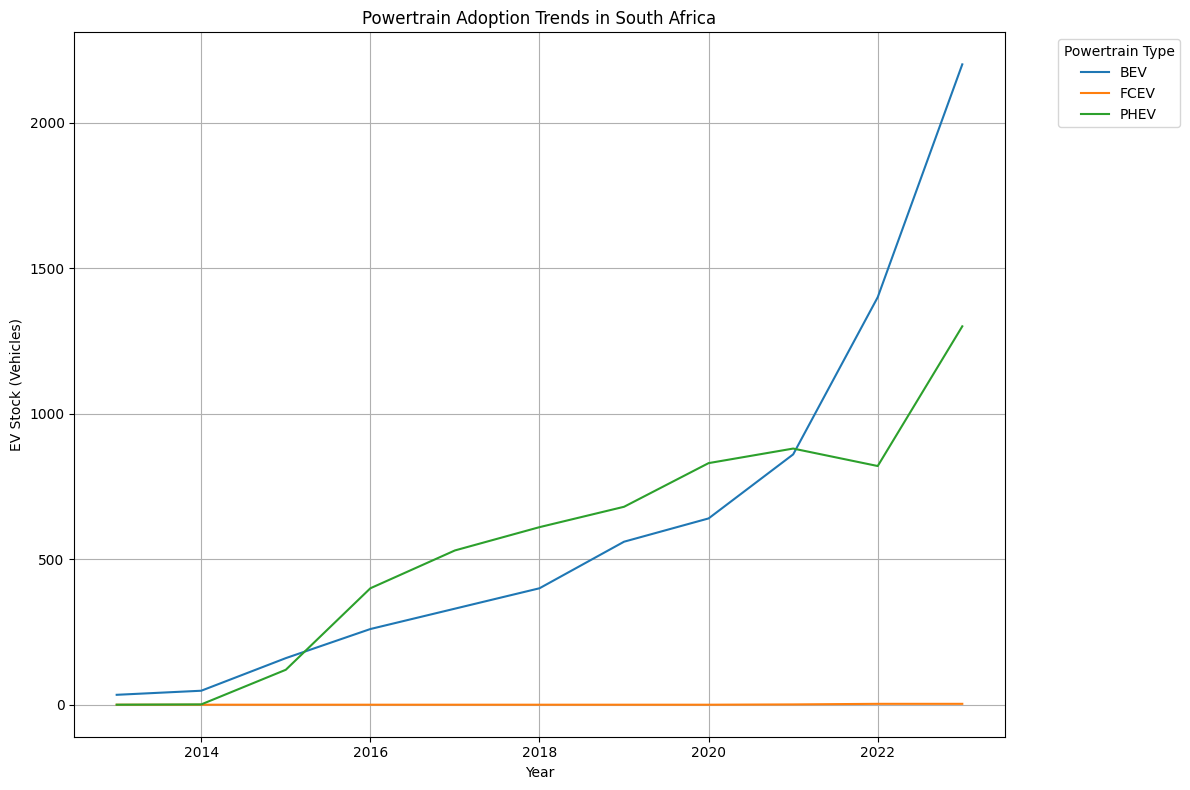

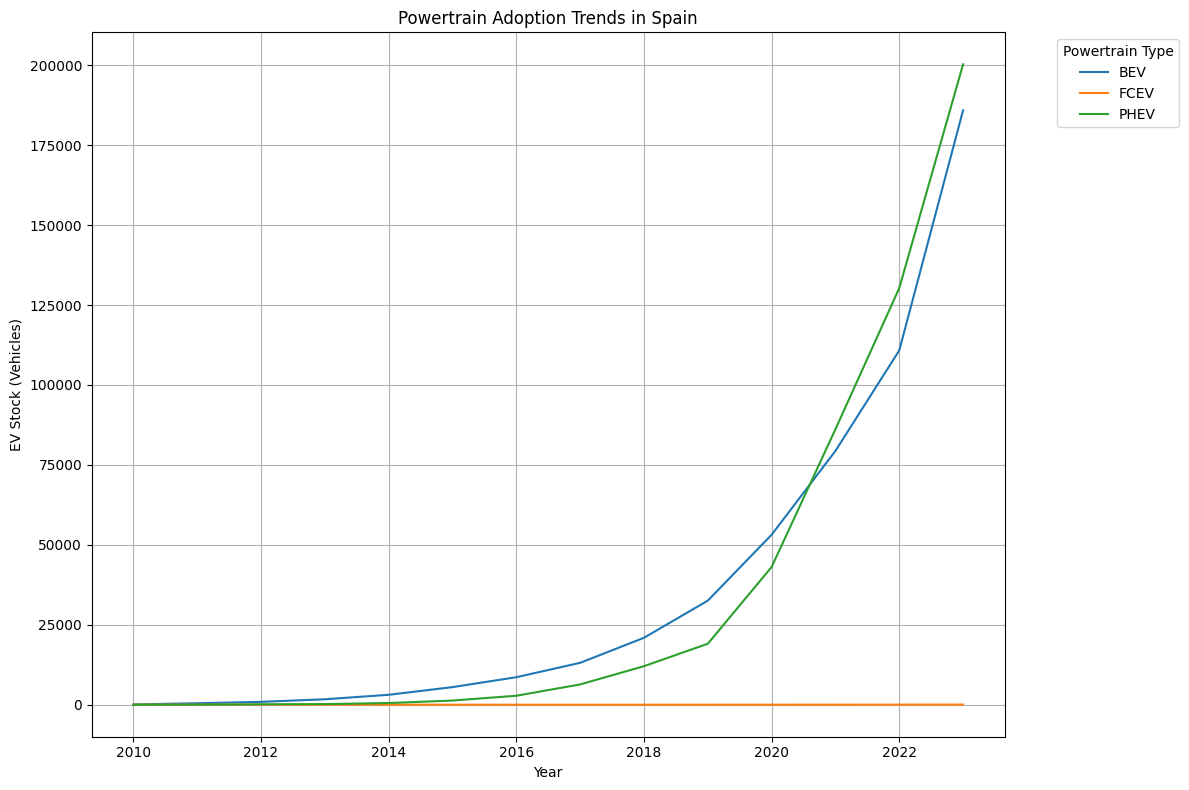

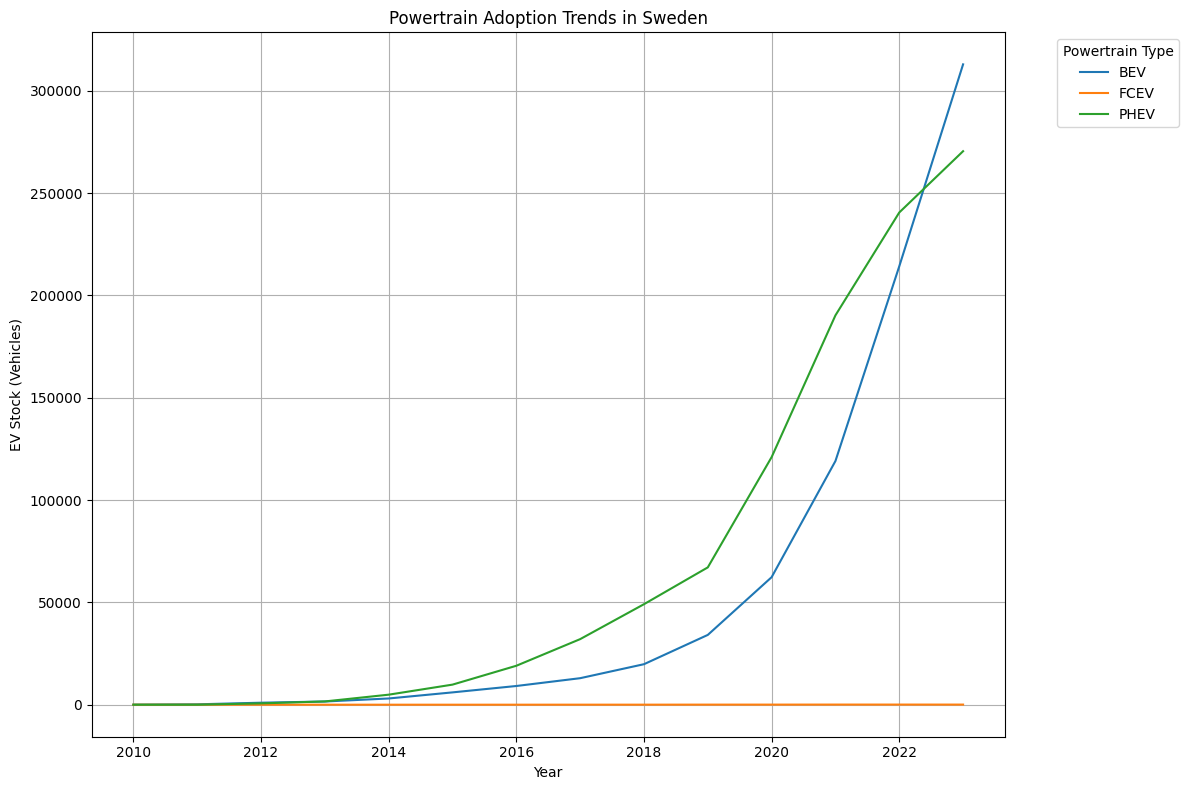

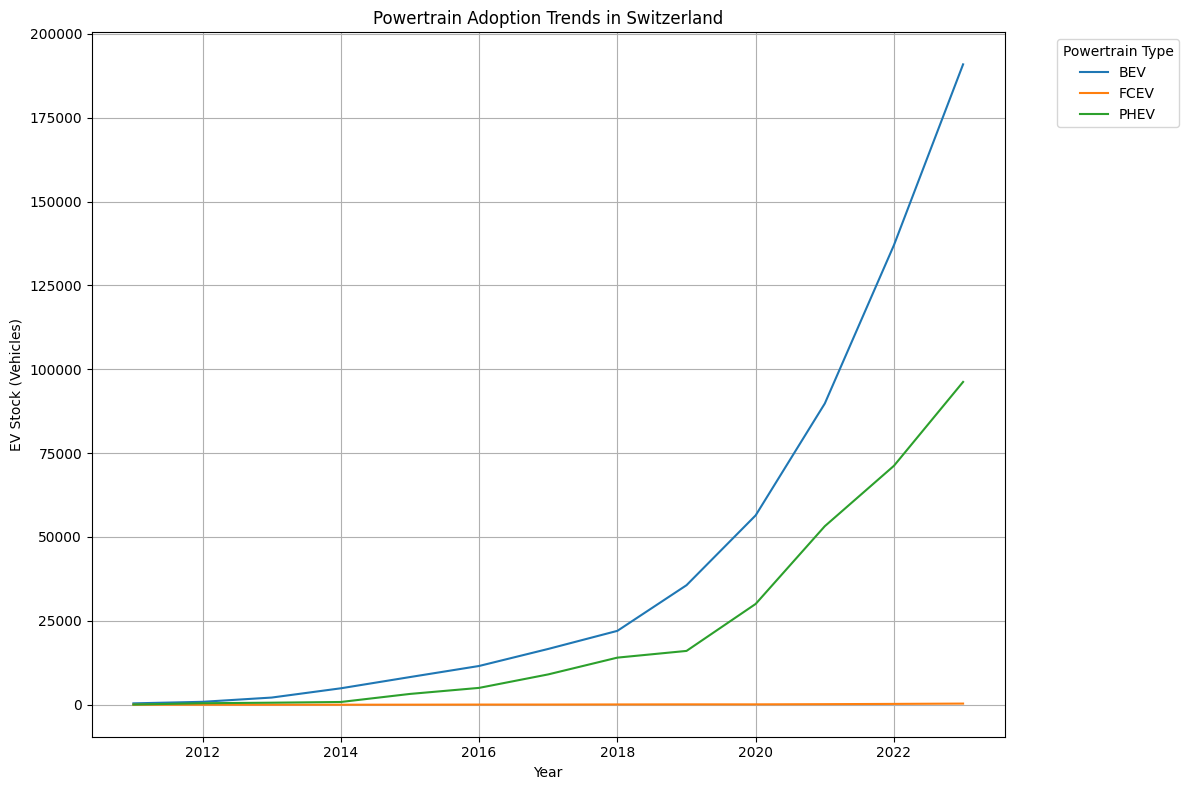

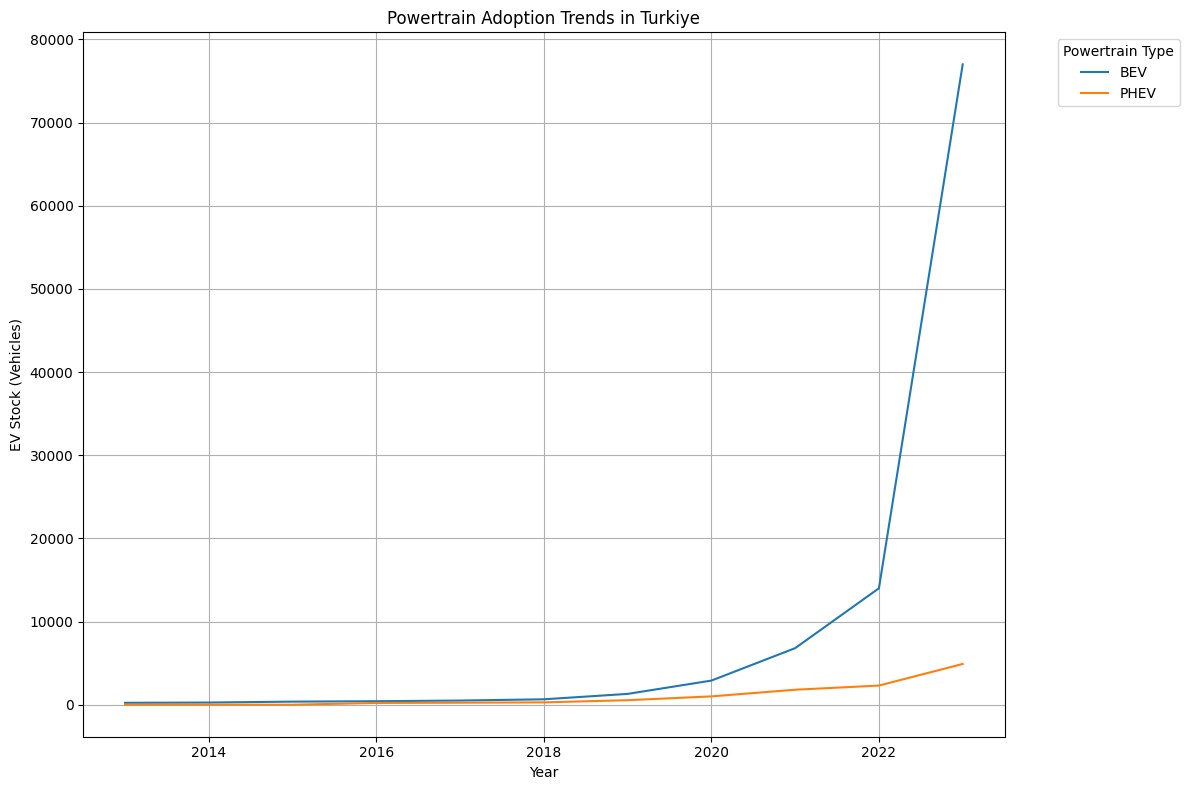

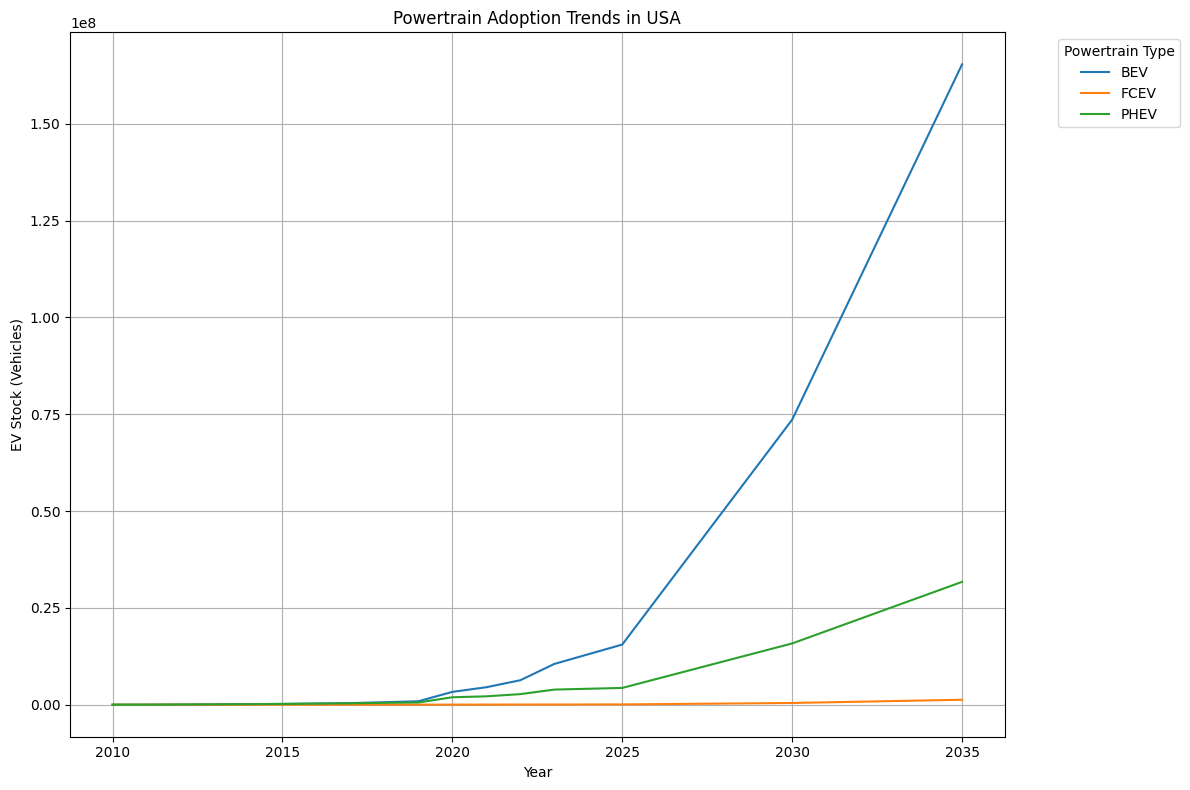

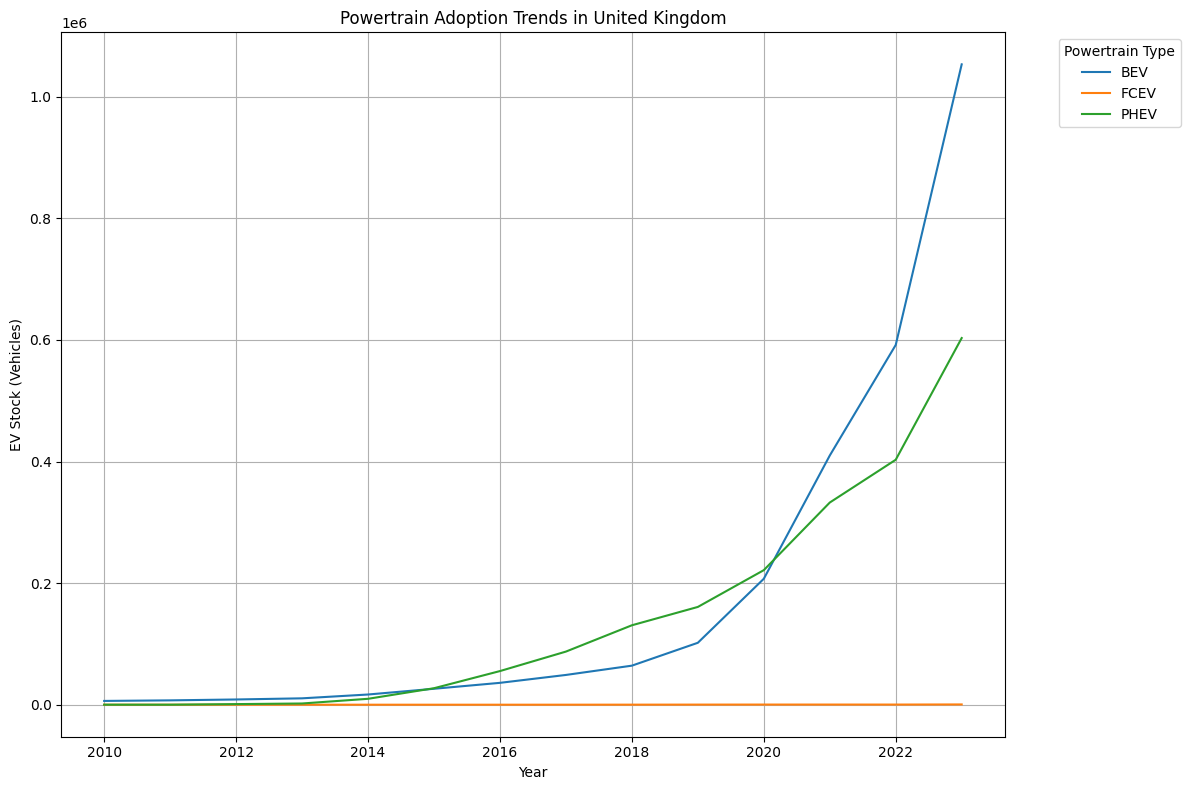

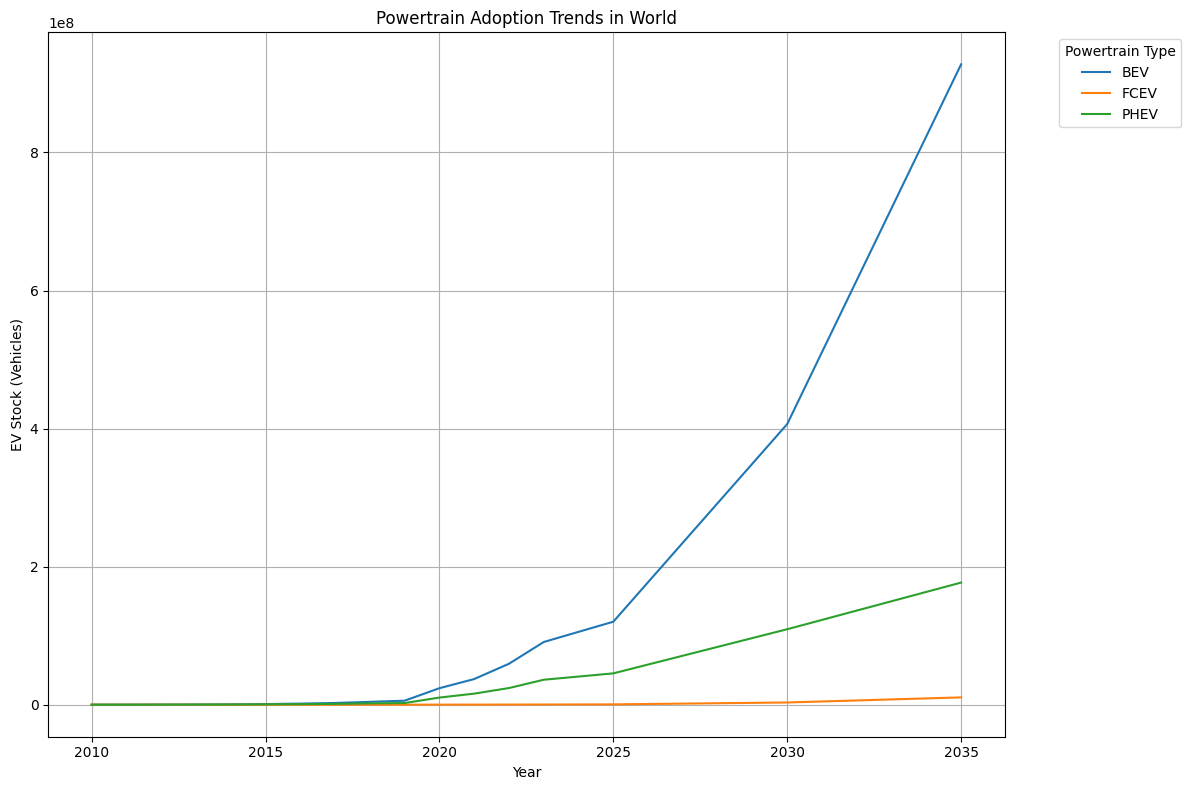

In [7]:

# Filter by powertrain
ev_powertrain_stock = data[(data['parameter'] == 'EV stock') & (data['unit'] == 'Vehicles')]

# Group by region, year, and powertrain
regional_powertrain_trends = ev_powertrain_stock.groupby(['region', 'year', 'powertrain'])['value'].sum().reset_index()

# Plot regional powertrain adoption trends
regions = regional_powertrain_trends['region'].unique()

plt.figure(figsize=(16, 10))
for region in regions:
    subset = regional_powertrain_trends[regional_powertrain_trends['region'] == region]
    pivot = subset.pivot(index='year', columns='powertrain', values='value').fillna(0)
    pivot.plot(title=f"Powertrain Adoption Trends in {region}", figsize=(12, 8))
    plt.xlabel("Year")
    plt.ylabel("EV Stock (Vehicles)")
    plt.grid()
    plt.legend(title="Powertrain Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



<Figure size 1200x800 with 0 Axes>

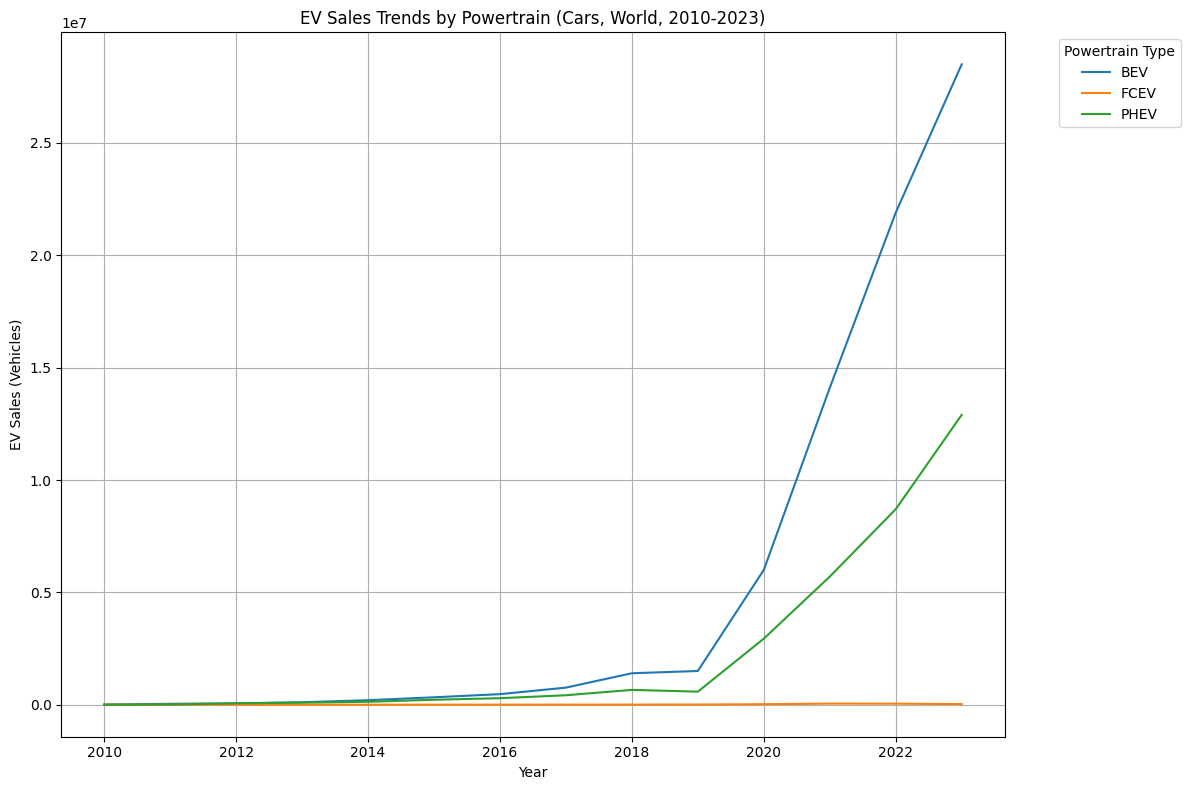

Powertrain Types Explanation:
BEV: Battery Electric Vehicles: Fully electric vehicles powered solely by a battery and electric motor.
PHEV: Plug-in Hybrid Electric Vehicles: Vehicles with both an internal combustion engine and a rechargeable battery, capable of running on electricity alone for short distances.
HEV: Hybrid Electric Vehicles: Vehicles that combine an internal combustion engine with an electric motor, but cannot be charged externally.
FCEV: Fuel Cell Electric Vehicles: Electric vehicles powered by hydrogen fuel cells instead of batteries.
EV: Electric Vehicles: A general category that can include BEVs, PHEVs, and FCEVs.


In [8]:
# Filter the dataset by Cars, World, and by powertrain
ev_sales_cars_world = data[
    (data['parameter'] == 'EV sales') &
    (data['mode'] == 'Cars') &
    (data['region'] == 'World') &
    (data['unit'] == 'Vehicles')
]

# Filter for the time period 2010-2023
ev_sales_cars_world = ev_sales_cars_world[(ev_sales_cars_world['year'] >= 2010) & (ev_sales_cars_world['year'] <= 2023)]

# Group by year and powertrain to analyze trends
powertrain_sales_trends = ev_sales_cars_world.groupby(['year', 'powertrain'])['value'].sum().unstack()
powertrain_sales_trends

# Plot EV sales trends by powertrain
plt.figure(figsize=(12, 8))
powertrain_sales_trends.plot(kind='line', title="EV Sales Trends by Powertrain (Cars, World, 2010-2023)", figsize=(12, 8))
plt.xlabel("Year")
plt.ylabel("EV Sales (Vehicles)")
plt.legend(title="Powertrain Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Explanation of Powertrain Types
powertrain_explanation = {
    'BEV': 'Battery Electric Vehicles: Fully electric vehicles powered solely by a battery and electric motor.',
    'PHEV': 'Plug-in Hybrid Electric Vehicles: Vehicles with both an internal combustion engine and a rechargeable battery, capable of running on electricity alone for short distances.',
    'HEV': 'Hybrid Electric Vehicles: Vehicles that combine an internal combustion engine with an electric motor, but cannot be charged externally.',
    'FCEV': 'Fuel Cell Electric Vehicles: Electric vehicles powered by hydrogen fuel cells instead of batteries.',
    'EV': 'Electric Vehicles: A general category that can include BEVs, PHEVs, and FCEVs.',
}

print("Powertrain Types Explanation:")
for key, value in powertrain_explanation.items():
    print(f"{key}: {value}")



In [9]:


#EV and Emisssions data cleaning and merge
# File paths
co2_data_path = 'GCB2022v27_percapita_flat.csv'
ev_data_path = 'IEA Global EV Data 2024-2.csv'

# Load the datasets
co2_data = pd.read_csv(co2_data_path)
ev_data = pd.read_csv(ev_data_path)

# Cleaning and standardizing
co2_data.columns = co2_data.columns.str.lower().str.strip()
ev_data.columns = ev_data.columns.str.lower().str.strip()

co2_data.rename(columns={'iso 3166-1 alpha-3': 'iso_alpha3'}, inplace=True)

co2_data['country'] = co2_data['country'].str.strip()
ev_data['country'] = ev_data['country'].str.strip()

# merging the datasets on the 'country' column
merged_data = pd.merge(ev_data, co2_data, on=['country','year'], how='inner')

# Extract unique countries
unique_countries = merged_data['country'].unique()

# Display the unique countries
unique_countries_df = pd.DataFrame(unique_countries, columns=['Country'])
print(unique_countries_df)


                 Country
0              Australia
1                Austria
2                Belgium
3                 Brazil
4               Bulgaria
5                 Canada
6                  Chile
7                  China
8               Colombia
9             Costa Rica
10               Croatia
11                Cyprus
12        Czech Republic
13               Denmark
14               Estonia
15               Finland
16                France
17               Germany
18                Greece
19               Hungary
20               Iceland
21                 India
22             Indonesia
23               Ireland
24                Israel
25                 Italy
26                 Japan
27                Latvia
28             Lithuania
29            Luxembourg
30                Mexico
31           Netherlands
32           New Zealand
33                Norway
34                Poland
35              Portugal
36               Romania
37            Seychelles
38              Slovakia


In [10]:
# country-to-region dictionary with unique countries
country_to_region = {
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Costa Rica': 'Central America',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Middle East',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Mexico': 'North America',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Seychelles': 'Africa',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Thailand': 'Asia',
    'United Arab Emirates': 'Middle East',
    'United Kingdom': 'Europe',
    'USA': 'North America'
}


# Adding a 'region' column
merged_data['region'] = merged_data['country'].map(country_to_region)

print(merged_data.head())

# created new CSV file for merged data
output_path = 'merged_ev_co2_data.csv'
merged_data.to_csv(output_path, index=False)


     country    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value iso_alpha3      total      coal       oil       gas    cement  \
0    0.00039        AUS  18.062717  8.593472  5.806145  2.973543  0.156350   
1    0.00650        AUS  18.062717  8.593472  5.806145  2.973543  0.156350   
2   49.00000        AUS  18.062717  8.593472  5.806145  2.973543  0.156350   
3   49.00000        AUS  18.062717  8.593472  5.806145  2.973543  0.156350   
4  220.00000        AUS  17.869070  8.321354  5.881579  2.978784  0.154789   

    flaring     other   region  
0  0.352202  0.181004  Oceania  
1 

In [11]:
# Group by region and summarize gas emissions
gas_emissions_summary = merged_data.groupby('region').agg(
    total_gas_emissions=('gas', 'sum')
).reset_index()

gas_emissions_summary['total_gas_emissions'] = gas_emissions_summary['total_gas_emissions'].round(2)

# Print the summary
print("Gas Emissions by Region Per Capita:")
print(gas_emissions_summary)



Gas Emissions by Region Per Capita:
            region  total_gas_emissions
0           Africa                 9.69
1             Asia               674.07
2  Central America                 0.00
3           Europe              6378.88
4      Middle East               383.85
5    North America              2768.63
6          Oceania               464.87
7    South America               102.13


In [13]:
# Grouping data to summarize EV stock, EV sales, powertrain, and total emissions by region

ev_emissions_summary = merged_data[
    (merged_data['parameter'].isin(['EV stock', 'EV sales'])) &
    (merged_data['unit'] == 'Vehicles')
].groupby(['region', 'parameter', 'powertrain']).agg(
    total_ev_value=('value', 'sum'),
    total_emissions=('total', 'sum')
).reset_index()

# Created new CSV file for emissions summary
output_path = 'ev_emissions_summary.csv'
ev_emissions_summary.to_csv(output_path, index=False)
print(f"Table saved to {output_path}")



Table saved to ev_emissions_summary.csv


In [19]:
#USE THIS
ev_gas_emissions_summary_pivot = pd.read_csv('ev_emissions_summary.csv')[1:]

ev_gas_emissions_summary_pivot['total_ev_value'] = ev_gas_emissions_summary_pivot['total_ev_value'].astype(float)
region_summary= ev_gas_emissions_summary_pivot.groupby('region').agg({"total_ev_value":"sum"})

region_summary = region_summary.merge(gas_emissions_summary,on="region",how='left')
region_summary = region_summary.rename({'total_gas_emissions':'total_gas_emissions_per_capita'},axis='columns')
print(region_summary) #Get EV sales and EV stock by region

            region  total_ev_value  total_gas_emissions_per_capita
0           Africa    8.231000e+03                            9.69
1             Asia    7.460474e+07                          674.07
2  Central America    8.031000e+03                            0.00
3           Europe    1.990679e+07                         6378.88
4      Middle East    1.369060e+05                          383.85
5    North America    2.229256e+07                         2768.63
6          Oceania    3.077830e+05                          464.87
7    South America    6.299800e+04                          102.13


<Figure size 1200x800 with 0 Axes>

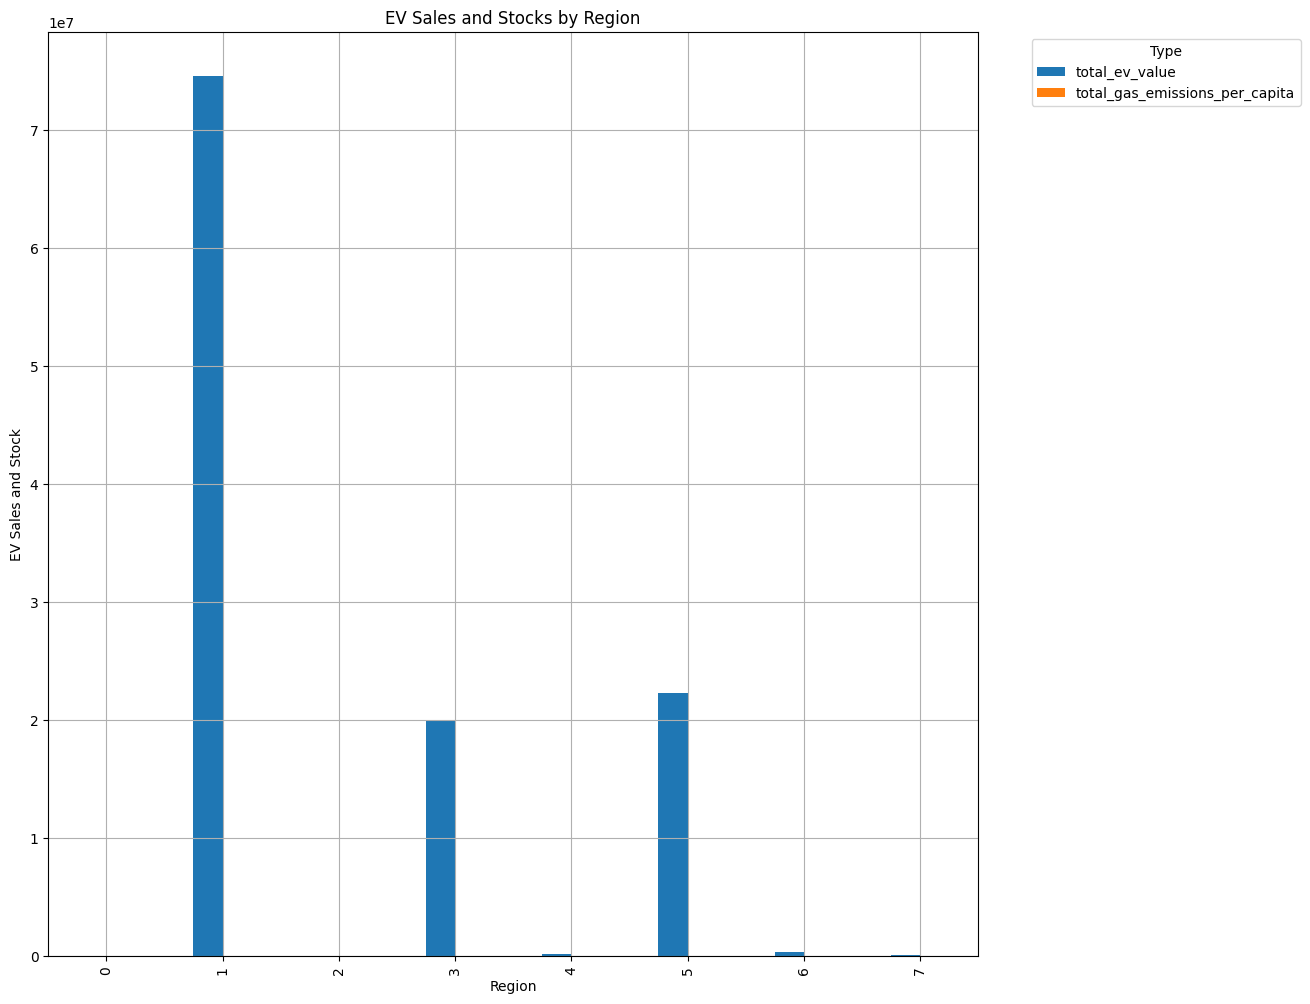

In [20]:
plt.figure(figsize=(12, 8))
region_summary.plot(kind='bar', title="EV Sales and Stocks by Region", figsize=(12, 12))
plt.xlabel("Region")
plt.ylabel("EV Sales and Stock")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [23]:
region_type_summary= ev_gas_emissions_summary_pivot.groupby('powertrain').agg({"total_ev_value":"sum"})
print(region_type_summary)

            total_ev_value
powertrain                
BEV           8.592962e+07
FCEV          2.201274e+05
PHEV          3.117829e+07


<Figure size 1200x800 with 0 Axes>

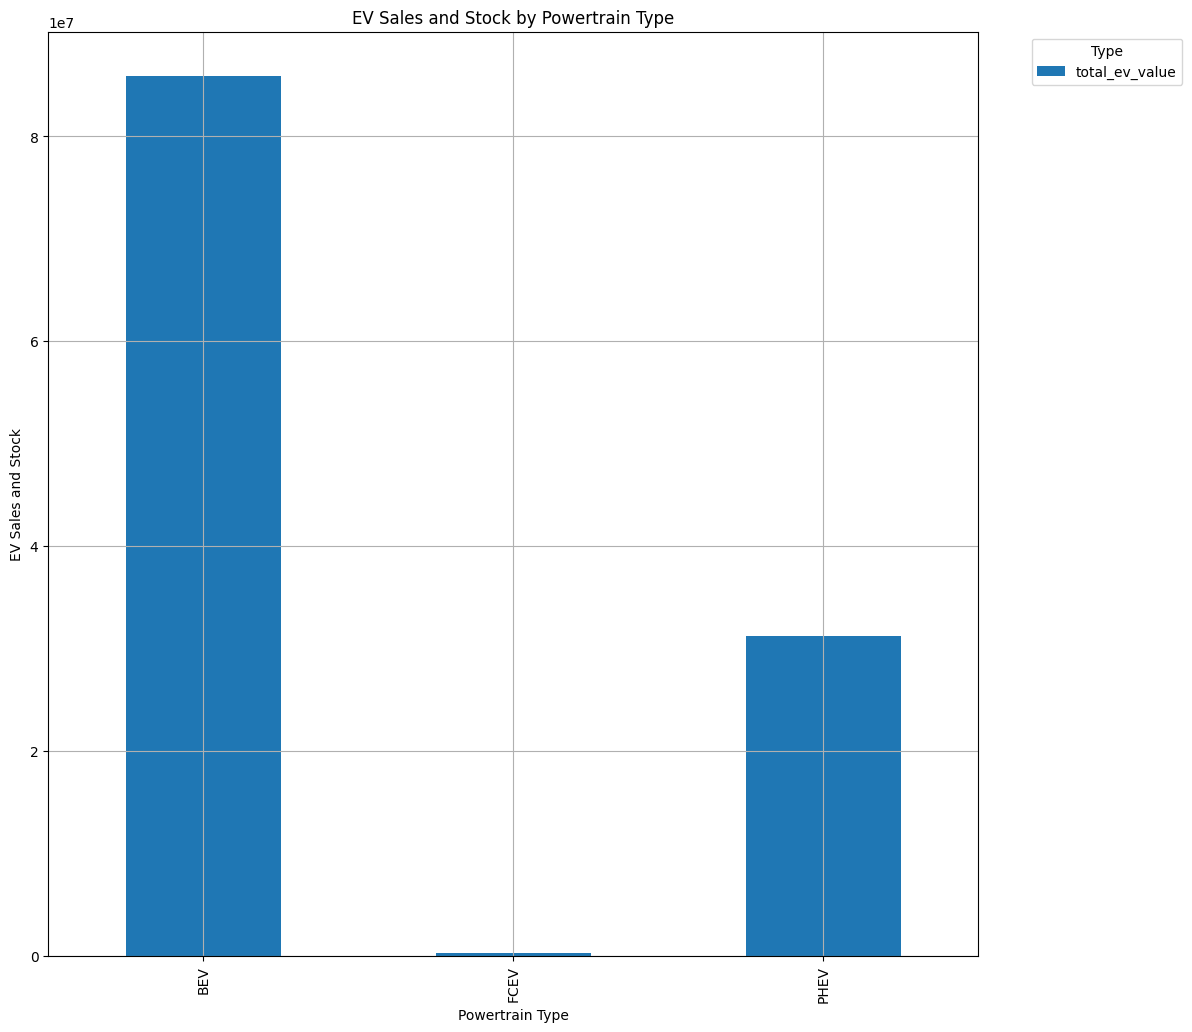

In [24]:
plt.figure(figsize=(12, 8))
region_type_summary.plot(kind='bar', title="EV Sales and Stock by Powertrain Type", figsize=(12, 12))
plt.xlabel("Powertrain Type")
plt.ylabel("EV Sales and Stock")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [32]:
region_BEV_type_summary = ev_gas_emissions_summary_pivot[ev_gas_emissions_summary_pivot['powertrain'] == "BEV"].groupby('region').agg({"total_ev_value":"sum"})
print('Total BEV Value:')
print(region_BEV_type_summary)

Total BEV Value:
                 total_ev_value
region                         
Africa             3.292000e+03
Asia               6.028987e+07
Central America    8.031000e+03
Europe             1.114925e+07
Middle East        4.749200e+04
North America      1.419924e+07
Oceania            2.114040e+05
South America      2.103200e+04


<Figure size 1200x800 with 0 Axes>

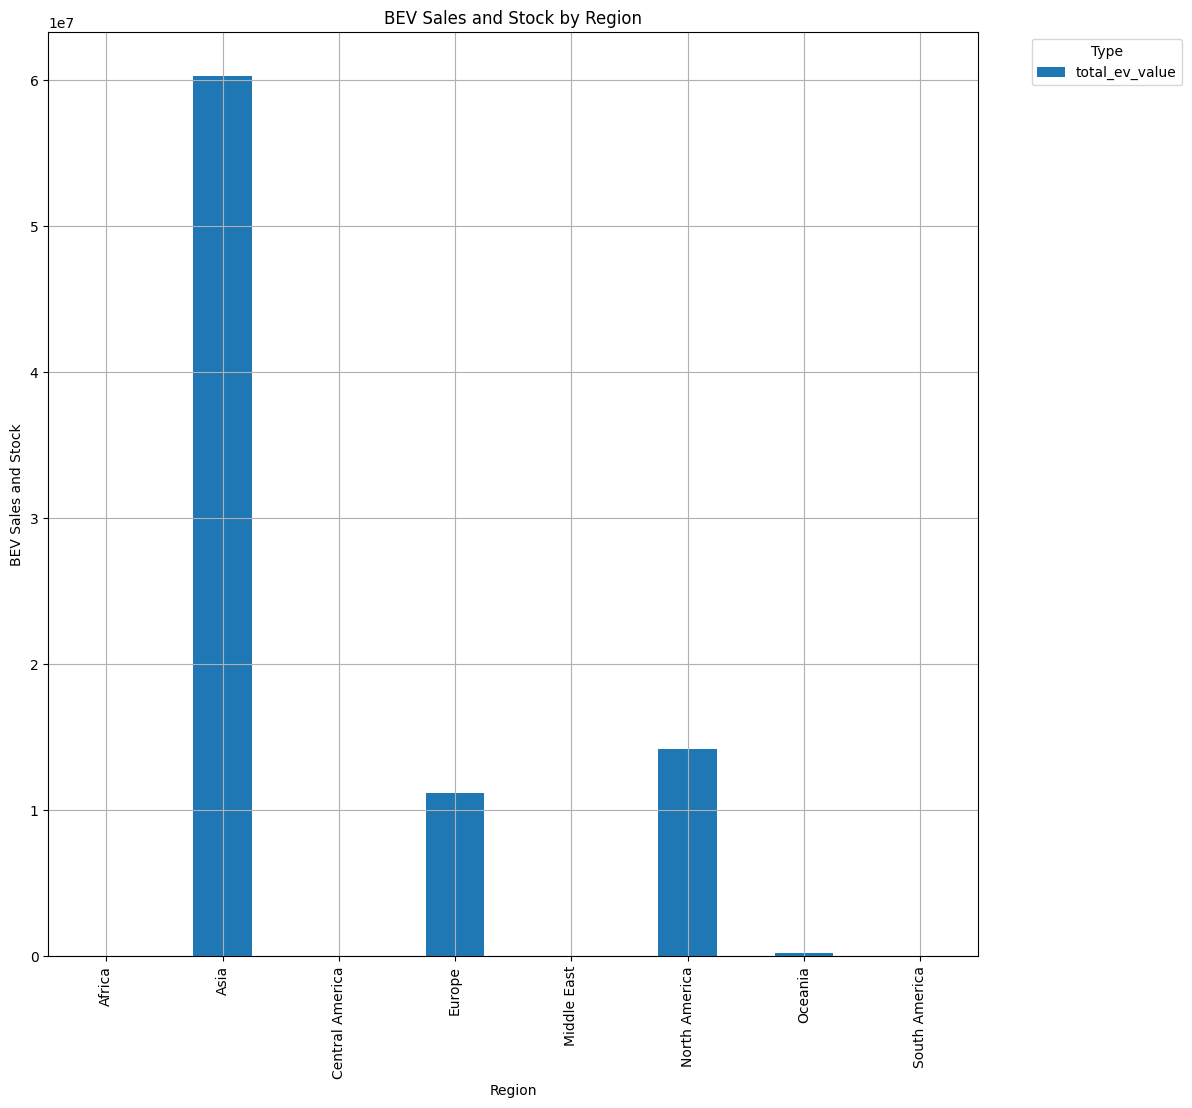

In [33]:
plt.figure(figsize=(12, 8))
region_BEV_type_summary.plot(kind='bar', title="BEV Sales and Stock by Region", figsize=(12, 12))
plt.xlabel("Region")
plt.ylabel("BEV Sales and Stock")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [36]:
region_PHEV_type_summary= ev_gas_emissions_summary_pivot[ev_gas_emissions_summary_pivot['powertrain'] == "PHEV"].groupby('region').agg({"total_ev_value":"sum"})
print('Total PHEV Value')
print(region_PHEV_type_summary)

Total PHEV Value
               total_ev_value
region                       
Africa                 4937.0
Asia               14216933.0
Europe              8741124.0
Middle East           89411.0
North America       7987664.0
Oceania               96266.0
South America         41959.0


<Figure size 1200x800 with 0 Axes>

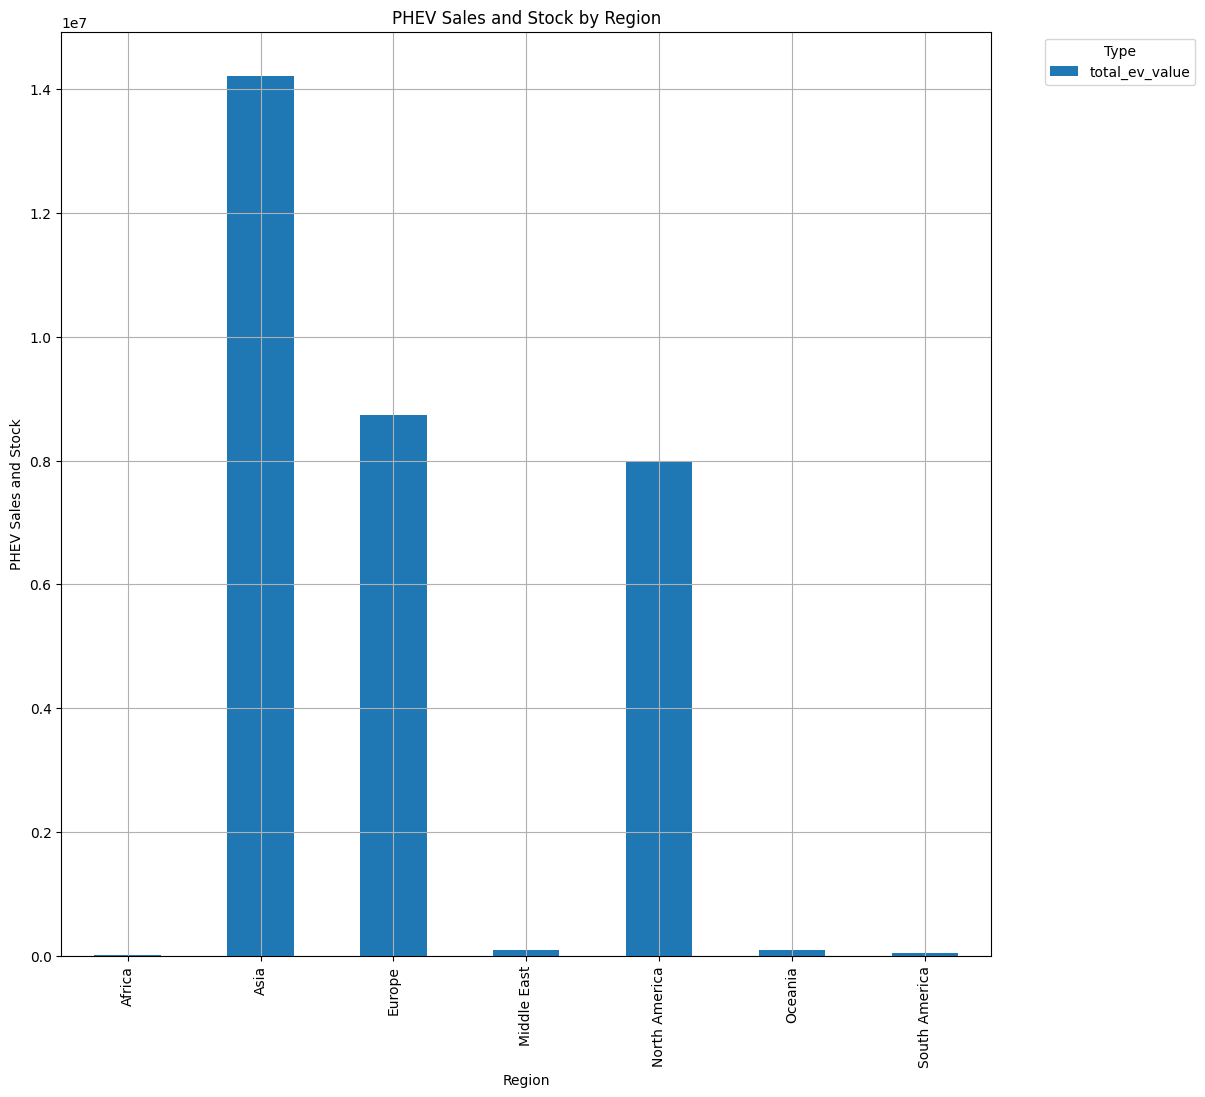

In [37]:
plt.figure(figsize=(12, 8))
region_PHEV_type_summary.plot(kind='bar', title="PHEV Sales and Stock by Region", figsize=(12, 12))
plt.xlabel("Region")
plt.ylabel("PHEV Sales and Stock")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [38]:
region_FCEV_type_summary= ev_gas_emissions_summary_pivot[ev_gas_emissions_summary_pivot['powertrain'] == "FCEV"].groupby('region').agg({"total_ev_value":"sum"})
print('Total FCEV value')
print(region_FCEV_type_summary)

Total FCEV value
               total_ev_value
region                       
Africa                    2.0
Asia                  97931.0
Europe                16421.4
Middle East               3.0
North America        105650.0
Oceania                 113.0
South America             7.0


<Figure size 1200x800 with 0 Axes>

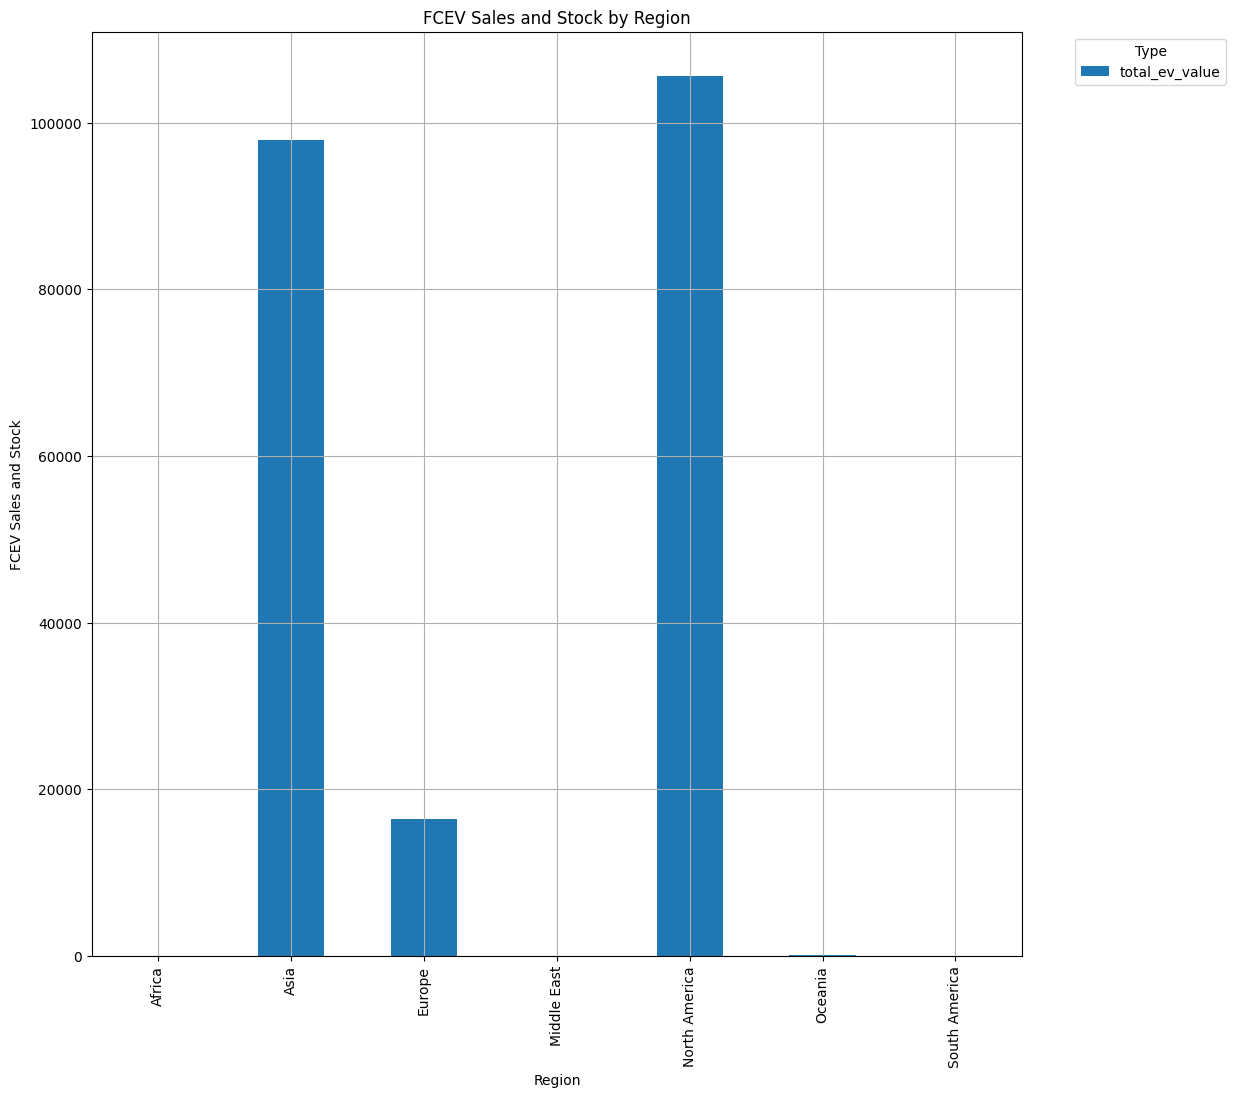

In [39]:
plt.figure(figsize=(12, 8))
region_FCEV_type_summary.plot(kind='bar', title="FCEV Sales and Stock by Region", figsize=(12, 12))
plt.xlabel("Region")
plt.ylabel("FCEV Sales and Stock")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [40]:
# DATA: annual-co-emissions.csv (link below)
import pandas as pd

# Load the emissions dataset and assign to emissions_by_income_Data #https://ourworldindata.org/explorers/co2?Gas+or+Warming=CO%E2%82%82&Accounting=Territorial&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+country&country=CHN~USA~IND~GBR~OWID_WRL
emissions_by_income_Data = pd.read_csv('annual-co-emissions.csv')
# Display a summary of the dataset
print(emissions_by_income_Data.describe())

               Year  Annual CO₂ emissions
count  29137.000000          2.913700e+04
mean    1947.718022          4.156982e+08
std       58.985133          1.945844e+09
min     1750.000000          0.000000e+00
25%     1912.000000          3.737280e+05
50%     1962.000000          4.990392e+06
75%     1994.000000          5.327268e+07
max     2023.000000          3.779157e+10


Line chart saved to: CO2_Emissions_by_Income_Group.png


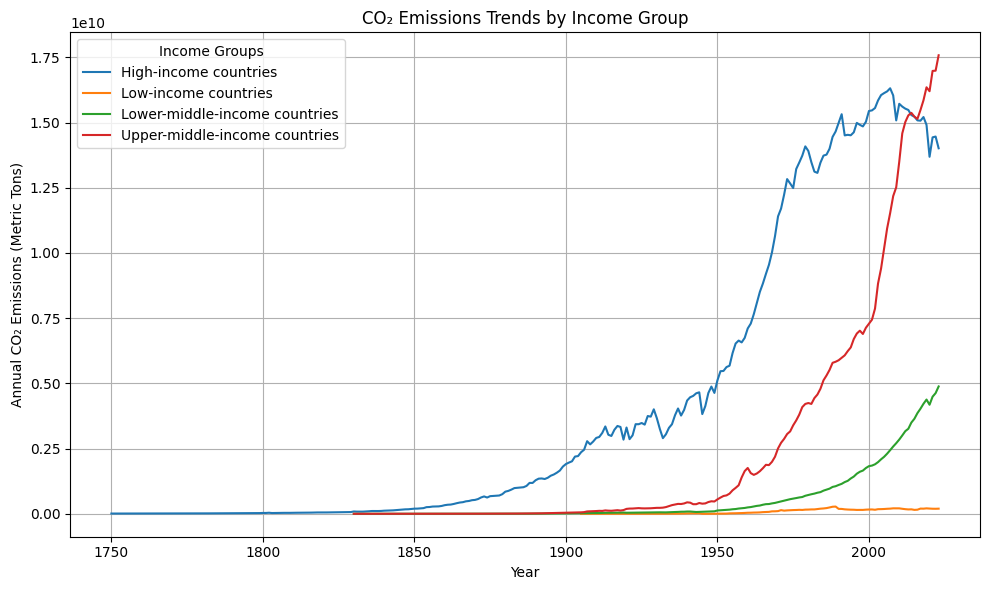

In [41]:

import matplotlib.pyplot as plt

# Filter the emissions data for income-based entities
income_groups = ['High-income countries', 'Low-income countries',
                 'Lower-middle-income countries', 'Upper-middle-income countries']
income_emissions = emissions_by_income_Data[emissions_by_income_Data['Entity'].isin(income_groups)]

# Group by Entity and Year to calculate total CO₂ emissions
income_emissions_grouped = income_emissions.groupby(['Entity', 'Year'])['Annual CO₂ emissions'].sum().reset_index()

# Plot the CO₂ emissions over time for income-based groups
plt.figure(figsize=(10, 6))
for group in income_groups:
    group_data = income_emissions_grouped[income_emissions_grouped['Entity'] == group]
    plt.plot(group_data['Year'], group_data['Annual CO₂ emissions'], label=group)

# Customize the plot
plt.title('CO₂ Emissions Trends by Income Group')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (Metric Tons)')
plt.legend(title='Income Groups')
plt.grid(True)
plt.tight_layout()

# Save the plot
output_path = 'CO2_Emissions_by_Income_Group.png'
plt.savefig(output_path)
print(f"Line chart saved to: {output_path}")

# Display the plot
plt.show()


In [42]:
# DATA:  IEA GLobal EV 2024.CSV & annual-co-emissions.csv
import pandas as pd

# Reload or redefine the datasets if necessary
ev_data = pd.read_csv('IEA Global EV Data 2024.csv')
emissions_data = pd.read_csv('annual-co-emissions.csv')

#  1: Standardize column names for merging
ev_data.rename(columns={'region': 'country', 'year': 'Year'}, inplace=True)
emissions_data.rename(columns={'Entity': 'country', 'Year': 'Year'}, inplace=True)

#  2: Merge datasets on 'country' and 'Year'
merged_data = pd.merge(ev_data, emissions_data, on=['country', 'Year'], how='inner')

#  3: Check the merged dataset
print("Summary of the Merged Dataset:")
print(f"- Total Rows: {merged_data.shape[0]}")
print(f"- Total Columns: {merged_data.shape[1]}")
print("\nSample Rows:")
print(merged_data.head())

#  4: Save the corrected merged dataset
merged_output_path = 'corrected_merged_ev_co2_data.csv'
merged_data.to_csv(merged_output_path, index=False)
print(f"\nCorrected merged dataset saved to: {merged_output_path}")

Summary of the Merged Dataset:
- Total Rows: 9126
- Total Columns: 9

Sample Rows:
     country    category       parameter  mode powertrain  Year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  Annual CO₂ emissions  
0    0.00039           403858080.0  
1    0.00650           403858080.0  
2   49.00000           403858080.0  
3   49.00000           403858080.0  
4  220.00000           406196670.0  

Corrected merged dataset saved to: corrected_merged_ev_co2_data.csv


In [43]:
# DATA:  IEA GLobal EV 2024.CSV & annual-co-emissions.csv
import pandas as pd

# Reload or redefine the datasets if necessary
ev_data = pd.read_csv('IEA Global EV Data 2024.csv')
emissions_data = pd.read_csv('annual-co-emissions.csv')

#  1: Standardize column names for merging
ev_data.rename(columns={'region': 'country', 'year': 'Year'}, inplace=True)
emissions_data.rename(columns={'Entity': 'country', 'Year': 'Year'}, inplace=True)

#  2: Merge datasets on 'country' and 'Year'
merged_data = pd.merge(ev_data, emissions_data, on=['country', 'Year'], how='inner')

#  3: Check the merged dataset
print("Summary of the Merged Dataset:")
print(f"- Total Rows: {merged_data.shape[0]}")
print(f"- Total Columns: {merged_data.shape[1]}")
print("\nSample Rows:")
print(merged_data.head())

#  4: Save the corrected merged dataset
merged_output_path = 'corrected_merged_ev_co2_data.csv'
merged_data.to_csv(merged_output_path, index=False)
print(f"\nCorrected merged dataset saved to: {merged_output_path}")

Summary of the Merged Dataset:
- Total Rows: 9126
- Total Columns: 9

Sample Rows:
     country    category       parameter  mode powertrain  Year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  Annual CO₂ emissions  
0    0.00039           403858080.0  
1    0.00650           403858080.0  
2   49.00000           403858080.0  
3   49.00000           403858080.0  
4  220.00000           406196670.0  

Corrected merged dataset saved to: corrected_merged_ev_co2_data.csv


In [44]:
#  1: Filter the dataset to keep only rows with 'EV sales' and 'Historical' category
ev_sales_historical = merged_data[
    (merged_data['parameter'] == 'EV sales') &
    (merged_data['category'] == 'Historical')
].copy()

#  2: Verify the filtered subset
print("EV Sales (Historical) and CO₂ Emissions Subset:")
print(ev_sales_historical.head())

#  3: Save the subset to a new CSV file
output_path_subset = 'ev_sales_historical_emissions.csv'
ev_sales_historical.to_csv(output_path_subset, index=False)
print(f"EV Sales (Historical) Subset saved to: {output_path_subset}")


EV Sales (Historical) and CO₂ Emissions Subset:
      country    category parameter  mode powertrain  Year      unit  value  \
2   Australia  Historical  EV sales  Cars        BEV  2011  Vehicles   49.0   
5   Australia  Historical  EV sales  Cars        BEV  2012  Vehicles  170.0   
9   Australia  Historical  EV sales  Cars       PHEV  2012  Vehicles   80.0   
10  Australia  Historical  EV sales  Cars       PHEV  2013  Vehicles  100.0   
14  Australia  Historical  EV sales  Cars        BEV  2013  Vehicles  190.0   

    Annual CO₂ emissions  
2            403858080.0  
5            406196670.0  
9            406196670.0  
10           399067520.0  
14           399067520.0  
EV Sales (Historical) Subset saved to: ev_sales_historical_emissions.csv


Summary of EV Sales and CO₂ Emissions by Region:
            region  Total EV Sales  Total CO₂ Emissions
0           Africa    3.801000e+03         1.005758e+10
1             Asia    2.415453e+07         1.310531e+12
2  Central America    8.831000e+03         6.954570e+07
3           Europe    1.165621e+07         2.399810e+11
4      Middle East    2.044780e+05         5.081100e+09
5    North America    6.404560e+05         4.590523e+10
6          Oceania    2.863390e+05         1.292065e+10
7    South America    1.146600e+05         3.019842e+10


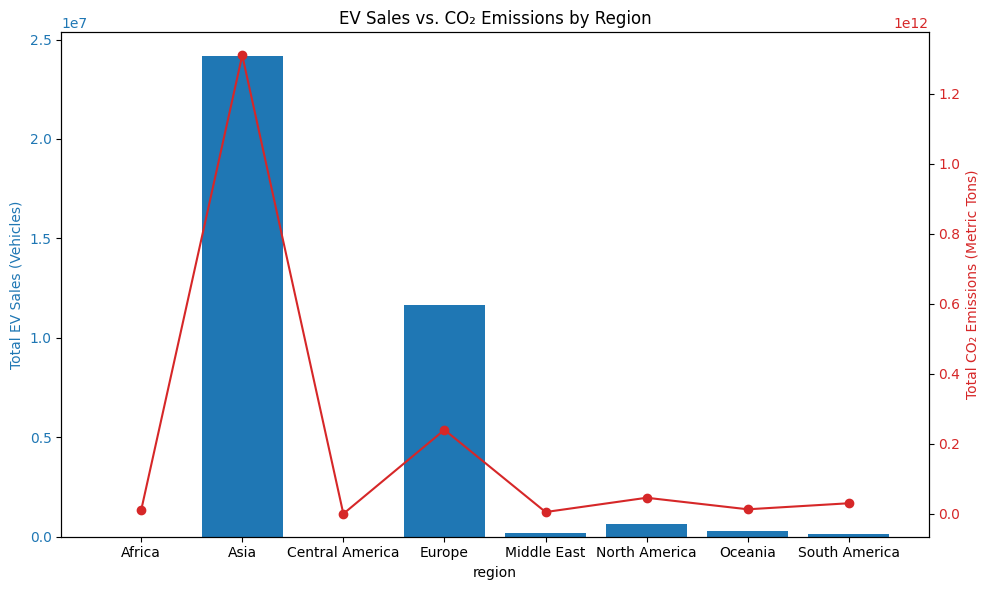

Summary table saved to: ev_co2_summary_by_region.csv
Visualization saved to: ev_co2_by_region.png


In [45]:
ev_sales_historical['region'] = ev_sales_historical['country'].map(country_to_region)
#  1: Summarize EV Sales and Annual CO₂ Emissions by Continent
ev_sales_by_continent = ev_sales_historical.groupby('region')['value'].sum().reset_index()
co2_by_continent = ev_sales_historical.groupby('region')['Annual CO₂ emissions'].sum().reset_index()

# Merge summaries into a single table
summary_by_continent = pd.merge(ev_sales_by_continent, co2_by_continent, on='region')
summary_by_continent.rename(columns={'value': 'Total EV Sales', 'Annual CO₂ emissions': 'Total CO₂ Emissions'}, inplace=True)

# Display the summary table
print("Summary of EV Sales and CO₂ Emissions by Region:")
print(summary_by_continent)

#  2: Visualize EV Sales and CO₂ Emissions by Region
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for EV Sales
ax1.bar(summary_by_continent['region'], summary_by_continent['Total EV Sales'], color='tab:blue', label='Total EV Sales')
ax1.set_xlabel('region')
ax1.set_ylabel('Total EV Sales (Vehicles)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for CO₂ Emissions
ax2 = ax1.twinx()
ax2.plot(summary_by_continent['region'], summary_by_continent['Total CO₂ Emissions'], color='tab:red', marker='o', label='Total CO₂ Emissions')
ax2.set_ylabel('Total CO₂ Emissions (Metric Tons)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and grid
plt.title('EV Sales vs. CO₂ Emissions by Region')
fig.tight_layout()
plt.show()

# Save the summary table and visualization
output_summary = 'ev_co2_summary_by_region.csv'
summary_by_continent.to_csv(output_summary, index=False)
print(f"Summary table saved to: {output_summary}")

output_plot = 'ev_co2_by_region.png'
fig.savefig(output_plot)
print(f"Visualization saved to: {output_plot}")

Summary of EV Sales and CO₂ Emissions Over Time:
    Year  Total EV Sales  Total CO₂ Emissions
0   2010    2.213300e+04         3.268394e+11
1   2011    1.025570e+05         3.468169e+11
2   2012    2.434570e+05         3.958326e+11
3   2013    4.039990e+05         4.426168e+11
4   2014    6.838892e+05         4.882278e+11
5   2015    1.383438e+06         4.636788e+11
6   2016    1.887638e+06         5.065873e+11
7   2017    2.948408e+06         5.673075e+11
8   2018    4.491653e+06         6.279771e+11
9   2019    4.762718e+06         6.560715e+11
10  2020    7.371981e+06         6.340214e+11
11  2021    1.521415e+07         7.002326e+11
12  2022    2.276845e+07         6.984554e+11
13  2023    3.021284e+07         6.989286e+11


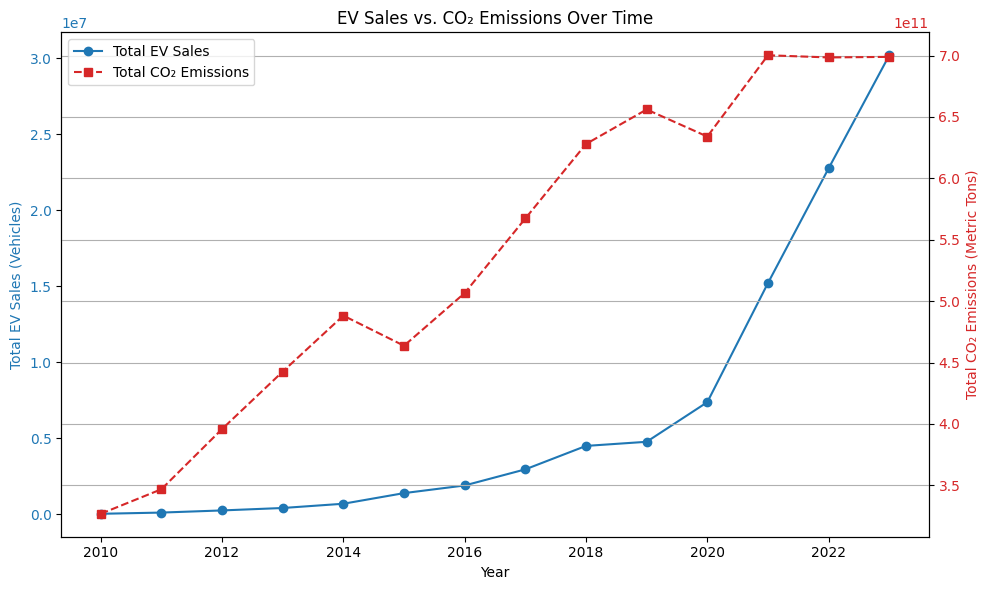

Summary table saved to: ev_co2_summary_over_time.csv
Visualization saved to: ev_co2_over_time.png


In [46]:
import matplotlib.pyplot as plt

#  1: Summarize EV Sales and Annual CO₂ Emissions Over Time
ev_sales_over_time = ev_sales_historical.groupby('Year')['value'].sum().reset_index()
co2_over_time = ev_sales_historical.groupby('Year')['Annual CO₂ emissions'].sum().reset_index()

# Merge summaries into a single table
summary_over_time = pd.merge(ev_sales_over_time, co2_over_time, on='Year')
summary_over_time.rename(columns={'value': 'Total EV Sales', 'Annual CO₂ emissions': 'Total CO₂ Emissions'}, inplace=True)

# Display the summary table
print("Summary of EV Sales and CO₂ Emissions Over Time:")
print(summary_over_time)

#  2: Visualize EV Sales and CO₂ Emissions Over Time
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for EV Sales
ax1.plot(summary_over_time['Year'], summary_over_time['Total EV Sales'], color='tab:blue', marker='o', label='Total EV Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total EV Sales (Vehicles)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for CO₂ Emissions
ax2 = ax1.twinx()
ax2.plot(summary_over_time['Year'], summary_over_time['Total CO₂ Emissions'], color='tab:red', marker='s', linestyle='--', label='Total CO₂ Emissions')
ax2.set_ylabel('Total CO₂ Emissions (Metric Tons)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title, legend, and grid
plt.title('EV Sales vs. CO₂ Emissions Over Time')
fig.tight_layout()
plt.grid(True)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Show and save the plot
plt.show()

# Save the summary table and visualization
output_summary = 'ev_co2_summary_over_time.csv'
summary_over_time.to_csv(output_summary, index=False)
print(f"Summary table saved to: {output_summary}")

output_plot = 'ev_co2_over_time.png'
fig.savefig(output_plot)
print(f"Visualization saved to: {output_plot}")

Visualization saved to: CO2_Emissions_vs_EV_Sales_Over_Time.png


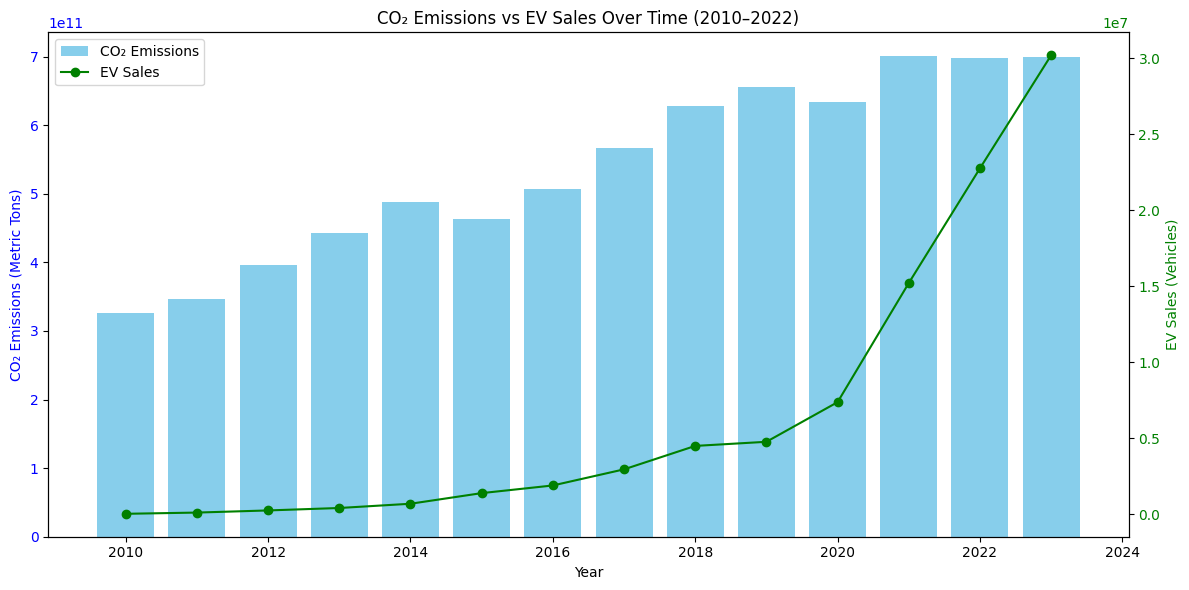

In [47]:
#  1: Group Data by Year for Total CO₂ Emissions and EV Sales
co2_over_time = ev_sales_historical.groupby('Year')['Annual CO₂ emissions'].sum().reset_index()
ev_sales_over_time = ev_sales_historical.groupby('Year')['value'].sum().reset_index()

# Merge both summaries for better alignment
summary_over_time = pd.merge(co2_over_time, ev_sales_over_time, on='Year')
summary_over_time.rename(columns={'Annual CO₂ emissions': 'Total CO₂ Emissions',
                                  'value': 'Total EV Sales'}, inplace=True)

#  2: Plotting the Dual-Axis Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: Total CO₂ Emissions
ax1.bar(summary_over_time['Year'], summary_over_time['Total CO₂ Emissions'],
        color='skyblue', label='CO₂ Emissions')
ax1.set_xlabel("Year")
ax1.set_ylabel("CO₂ Emissions (Metric Tons)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart: Total EV Sales
ax2 = ax1.twinx()
ax2.plot(summary_over_time['Year'], summary_over_time['Total EV Sales'],
         color='green', marker='o', label='EV Sales')
ax2.set_ylabel("EV Sales (Vehicles)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add Title and Legends
plt.title("CO₂ Emissions vs EV Sales Over Time (2010–2022)")
fig.tight_layout()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Display and Save the Visualization
output_path = 'CO2_Emissions_vs_EV_Sales_Over_Time.png'
plt.savefig(output_path)
print(f"Visualization saved to: {output_path}")
plt.show()